# Bancos Alimentares em cada país e sua influência no PIB e IDH  

## Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import warnings
from sklearn.preprocessing import LabelEncoder

## Beautiful Soup para PIB

- A partir da url é feita uma requisição do tipo parser;
- É colocado em uma lista, para cada linha, os valores de todas as colunas das 6 primeiras tabelas da página;
- Todos os valores extraídos são adicionados em um dataset.

In [2]:
warnings.filterwarnings('ignore')

url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)#"
data = requests.get(url).text

soup = BeautifulSoup(data, 'html.parser')

tables = soup.find_all('table')

output = []

for table in tables[0:6]:
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        cols = [item.text.strip() for item in cols]
        output.append([item for item in cols if item])

            
df = pd.DataFrame(output)
df = df.rename(columns={0: 'Country', 1: 'y1', 2: 'y2', 3: 'y3', 4: 'y4', 5: 'y5', 6: 'y6', 7: 'y7', 8: 'y8', 9: 'y9', 10: 'y10'})

try:
    df['Country'] = df['Country'].str.replace('\u202f*', '')
    df['Country'] = df['Country'].str.replace('*', '')
except:
    df['Country'] = df['Country']
    
df = df.drop(index=0)

Reestruturação do dataset do PIB

In [3]:
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df5 = pd.DataFrame()

for country in df['Country'].unique():    
    df_temp = df[df['Country'] == country]
    df_temp = df_temp.reset_index(drop=True)
    for i in range(len(df_temp)):
        if i == 0:
            df0 = df0.append(df_temp.loc[i])
        elif i == 1:
            df1 = df1.append(df_temp.loc[i])
        elif i == 2:
            df2 = df2.append(df_temp.loc[i])
        elif i == 3:
            df3 = df3.append(df_temp.loc[i])
        elif i == 4:
            df4 = df4.append(df_temp.loc[i])
        elif i == 5:
            df5 = df5.append(df_temp.loc[i])

In [4]:
df0 = df0.rename(columns={'y1': '1970', 'y2': '1971', 'y3': '1972', 'y4': '1973', 'y5': '1974', 'y6': '1975', 'y7': '1976', 'y8': '1977', 'y9': '1978', 'y10': '1979'})
df1 = df1.rename(columns={'y1': '1980', 'y2': '1981', 'y3': '1982', 'y4': '1983', 'y5': '1984', 'y6': '1985', 'y7': '1986', 'y8': '1987', 'y9': '1988', 'y10': '1989'})
df2 = df2.rename(columns={'y1': '1990', 'y2': '1991', 'y3': '1992', 'y4': '1993', 'y5': '1994', 'y6': '1995', 'y7': '1996', 'y8': '1997', 'y9': '1998', 'y10': '1999'})
df3 = df3.rename(columns={'y1': '2000', 'y2': '2001', 'y3': '2002', 'y4': '2003', 'y5': '2004', 'y6': '2005', 'y7': '2006', 'y8': '2007', 'y9': '2008', 'y10': '2009'})
df4 = df4.rename(columns={'y1': '2010', 'y2': '2011', 'y3': '2012', 'y4': '2013', 'y5': '2014', 'y6': '2015', 'y7': '2016', 'y8': '2017', 'y9': '2018', 'y10': '2019'})
df5 = df5.rename(columns={'y1': '2020', 'y2': '2021', 'y3': '2022', 'y4': '2023', 'y5': '2024', 'y6': '2025', 'y7': '2026', 'y8': '2027', 'y9': '2028', 'y10': '2029'})

In [5]:
df = df0.merge(df1, on='Country')
df = df.merge(df2, on='Country')
df = df.merge(df3, on='Country')
df = df.merge(df4, on='Country')
df = df.merge(df5, on='Country')

In [6]:
df_gdp = df
df_gdp.head()

Country   1970   1971   1972   1973    1974    1975    1976    1977  \
0  Afghanistan  1,749  1,831  1,596  1,733   2,156   2,367   2,556   2,953   
1      Albania  2,266  2,331  2,398  2,467   2,537   2,610   2,686   2,761   
2      Algeria  5,167  5,376  7,193  9,250  13,290  15,591  17,790  21,038   
3      Andorra     99    113    144    191     236     279     288     321   
4       Angola  3,807  4,007  4,102  5,016   5,627   4,147   3,981   4,344   

     1978  ...     2020     2021     2022     2023     2024     2025     2026  \
0   3,300  ...   20,136     None     None     None     None     None     None   
1   2,842  ...   15,161   18,310   18,509   20,177   20,847   21,932   23,086   
2  26,433  ...  145,656  163,138  195,415  206,007  210,860  218,341  225,090   
3     390  ...    2,885    3,330    3,400    3,669    3,823    3,868    3,870   
4   4,845  ...   57,139   74,791  121,417  117,877  124,102  130,262  136,042   

      2027     2028  2029  
0     None     None  None  
1   24,217   25,460  None  
2  228,991  232,992  None  
3    3,874    3,838  None  
4  143,146  151,540  None  

[5 rows x 61 columns]

## Banco Alimentar: Kaggle / IDH: Our World in Data

Fontes do dataset <br>
https://ourworldindata.org/grapher/human-development-index-escosura <br>
https://www.kaggle.com/datasets/pranav941/-world-food-wealth-bank/code?select=crop1.csv <br>

In [7]:
df_crop = pd.read_csv('crop1.csv')  
df_live = pd.read_csv('live1.csv') 
df_hdi = pd.read_csv('human-development-index-escosura.csv')

# Processamento dos dados 

## Dataset Agro

In [8]:
df_crop

Area                 Item  \
0                                    Afghanistan  Almonds, with shell   
1                                    Afghanistan  Almonds, with shell   
2                                    Afghanistan  Almonds, with shell   
3                                    Afghanistan  Almonds, with shell   
4                                    Afghanistan  Almonds, with shell   
...                                          ...                  ...   
1895970  Net Food Importing Developing Countries                Wheat   
1895971  Net Food Importing Developing Countries                Wheat   
1895972  Net Food Importing Developing Countries                Wheat   
1895973  Net Food Importing Developing Countries                Wheat   
1895974  Net Food Importing Developing Countries                Wheat   

                Element  Year    Unit       Value  
0        Area harvested  1975      ha         0.0  
1        Area harvested  1976      ha      5900.0  
2        Area harvested  1977      ha      6000.0  
3        Area harvested  1978      ha      6000.0  
4        Area harvested  1979      ha      6000.0  
...                 ...   ...     ...         ...  
1895970      Production  2016  tonnes  52845182.0  
1895971      Production  2017  tonnes  57099662.0  
1895972      Production  2018  tonnes  55571780.0  
1895973      Production  2019  tonnes  53903035.0  
1895974      Production  2020  tonnes  54159916.0  

[1895975 rows x 6 columns]

### Area

In [9]:
df_crop['Area'].describe()

count     1895975
unique        245
top         World
freq        21193
Name: Area, dtype: object

In [10]:
df_crop['Area'].value_counts()

World                                      21193
Asia                                       21154
Net Food Importing Developing Countries    20523
Americas                                   20322
Eastern Asia                               20313
                                           ...  
Tuvalu                                       633
Nauru                                        596
China, Macao SAR                             558
Faroe Islands                                180
Marshall Islands                              90
Name: Area, Length: 245, dtype: int64

### Item

In [11]:
df_crop['Item'].describe()

count                   1895975
unique                      118
top       Vegetables, fresh nes
freq                      38635
Name: Item, dtype: object

In [12]:
df_crop['Item'].value_counts()

Vegetables, fresh nes    38635
Maize                    33379
Tomatoes                 33326
Potatoes                 31597
Fruit, fresh nes         31485
                         ...  
Cinnamon (cannella)       4238
Cloves                    4070
Tung nuts                 3338
Ramie                     2943
Tallowtree seed            774
Name: Item, Length: 118, dtype: int64

### Element

In [13]:
df_crop['Element'].describe()

count        1895975
unique             3
top       Production
freq          663735
Name: Element, dtype: object

In [14]:
df_crop['Element'].value_counts()

Production        663735
Area harvested    656510
Yield             575730
Name: Element, dtype: int64

### Year

In [15]:
df_crop['Year'].max()

2020

In [16]:
df_crop['Year'].min()

1961

In [17]:
df_crop['Year'].value_counts()[0:5]

2018    36223
2006    35520
2017    35497
2019    35496
2016    35441
Name: Year, dtype: int64

### Unit

In [18]:
df_crop['Unit'].describe()

count     1895975
unique          3
top        tonnes
freq       663735
Name: Unit, dtype: object

In [19]:
df_crop['Unit'].value_counts()

tonnes    663735
ha        656510
hg/ha     575730
Name: Unit, dtype: int64

### Value

In [20]:
df_crop['Value'].describe()

count    1.766475e+06
mean     1.077275e+06
std      1.403138e+07
min      0.000000e+00
25%      4.500000e+03
50%      2.687500e+04
75%      1.303910e+05
max      1.955308e+09
Name: Value, dtype: float64

In [21]:
df_crop['Value'].value_counts()

0.0           10135
10000.0        6916
1000.0         6411
5000.0         5911
2000.0         5640
              ...  
697068.0          1
760800.0          1
530961.0          1
414221.0          1
54159916.0        1
Name: Value, Length: 420009, dtype: int64

## Dataset Pecuária

In [22]:
df_live

Area   Item Element  Year  Unit  \
0                                   Afghanistan  Asses  Stocks  1961  Head   
1                                   Afghanistan  Asses  Stocks  1962  Head   
2                                   Afghanistan  Asses  Stocks  1963  Head   
3                                   Afghanistan  Asses  Stocks  1964  Head   
4                                   Afghanistan  Asses  Stocks  1965  Head   
...                                         ...    ...     ...   ...   ...   
122453  Net Food Importing Developing Countries  Sheep  Stocks  2016  Head   
122454  Net Food Importing Developing Countries  Sheep  Stocks  2017  Head   
122455  Net Food Importing Developing Countries  Sheep  Stocks  2018  Head   
122456  Net Food Importing Developing Countries  Sheep  Stocks  2019  Head   
122457  Net Food Importing Developing Countries  Sheep  Stocks  2020  Head   

              Value  
0         1300000.0  
1          851850.0  
2         1001112.0  
3         1150000.0  
4         1300000.0  
...             ...  
122453  364166482.0  
122454  371357850.0  
122455  377303293.0  
122456  397970957.0  
122457  406555086.0  

[122458 rows x 6 columns]

### Area

In [23]:
df_live['Area'].describe()

count                                      122458
unique                                        243
top       Net Food Importing Developing Countries
freq                                          840
Name: Area, dtype: object

In [24]:
df_live['Area'].value_counts()

Net Food Importing Developing Countries    840
Egypt                                      840
Eastern Asia                               840
Western Asia                               840
Europe                                     840
                                          ... 
Tokelau                                    120
Montenegro                                 105
South Sudan                                 81
Sudan                                       81
China, Macao SAR                            60
Name: Area, Length: 243, dtype: int64

### Item

In [25]:
df_live['Item'].describe()

count       122458
unique          14
top       Chickens
freq         13131
Name: Item, dtype: object

In [26]:
df_live['Item'].value_counts()

Chickens                  13131
Cattle                    12956
Goats                     12543
Sheep                     12113
Pigs                      12029
Horses                    11168
Asses                      8777
Beehives                   8456
Ducks                      7362
Mules                      6509
Rabbits and hares          5140
Geese and guinea fowls     4660
Buffaloes                  3955
Camels                     3659
Name: Item, dtype: int64

### Element

In [27]:
df_live['Element'].describe()

count     122458
unique         1
top       Stocks
freq      122458
Name: Element, dtype: object

In [28]:
df_live['Element'].value_counts()

Stocks    122458
Name: Element, dtype: int64

### Year

In [29]:
df_live['Year'].min()

1961

In [30]:
df_live['Year'].max()

2020

In [31]:
df_live['Year'].value_counts()[0:5]

2006    2196
2001    2190
2000    2190
2002    2190
2003    2190
Name: Year, dtype: int64

### Unit

In [32]:
df_live['Unit'].describe()

count     122458
unique         3
top         Head
freq       83709
Name: Unit, dtype: object

In [33]:
df_live['Unit'].value_counts()

Head         83709
1000 Head    30293
No            8456
Name: Unit, dtype: int64

### Value

In [34]:
df_live['Value'].describe()

count    1.201940e+05
mean     1.035597e+07
std      5.869386e+07
min      0.000000e+00
25%      5.300000e+03
50%      1.021735e+05
75%      1.561571e+06
max      1.525939e+09
Name: Value, dtype: float64

In [35]:
df_live['Value'].value_counts()

1000.0         747
2000.0         603
4000.0         472
5000.0         466
3000.0         359
              ... 
1475980.0        1
1518180.0        1
1585600.0        1
1625200.0        1
406555086.0      1
Name: Value, Length: 61412, dtype: int64

## Dataset IDH

In [36]:
df_hdi.head()

Entity Code  Year  \
0  Afghanistan  AFG  1950   
1  Afghanistan  AFG  1955   
2  Afghanistan  AFG  1960   
3  Afghanistan  AFG  1965   
4  Afghanistan  AFG  1970   

   Historical Index of Human Development (Prados de la Escosura)  
0                                               0.04              
1                                               0.05              
2                                               0.06              
3                                               0.07              
4                                               0.09

In [37]:
df_hdi = df_hdi.rename(columns={'Historical Index of Human Development (Prados de la Escosura)': 'IDH', 'Entity': 'Area'})
df_hdi = df_hdi.drop('Code', axis=1)

In [38]:
df_hdi.head()

Area  Year   IDH
0  Afghanistan  1950  0.04
1  Afghanistan  1955  0.05
2  Afghanistan  1960  0.06
3  Afghanistan  1965  0.07
4  Afghanistan  1970  0.09

### Area

In [39]:
df_hdi['Area'].describe()

count         3210
unique         164
top       Zimbabwe
freq            24
Name: Area, dtype: object

In [40]:
df_hdi['Area'].value_counts()

Zimbabwe        24
Spain           24
Sierra Leone    24
Kenya           24
South Africa    24
                ..
Uzbekistan       7
Kyrgyzstan       7
Azerbaijan       7
Yemen            7
Kazakhstan       7
Name: Area, Length: 164, dtype: int64

### Year

In [41]:
df_hdi['Year'] = (df_hdi['Year'] + 5)
df_hdi['Year'].min()

1875

In [42]:
df_hdi['Year'].max()

2020

In [43]:
df_hdi['Year'].value_counts()[0:5]

2012    164
2005    164
2020    164
2015    164
2010    164
Name: Year, dtype: int64

### IDH

In [44]:
df_hdi['IDH'].describe()

count    3210.000000
mean        0.287542
std         0.202527
min         0.020000
25%         0.112500
50%         0.250000
75%         0.440000
max         0.900000
Name: IDH, dtype: float64

In [45]:
df_hdi['IDH'].value_counts()

0.02    136
0.03    117
0.04     99
0.12     74
0.15     74
       ... 
0.86      3
0.88      1
0.87      1
0.89      1
0.90      1
Name: IDH, Length: 89, dtype: int64

## Dataset PIB

In [46]:
df_gdp.head()

Country   1970   1971   1972   1973    1974    1975    1976    1977  \
0  Afghanistan  1,749  1,831  1,596  1,733   2,156   2,367   2,556   2,953   
1      Albania  2,266  2,331  2,398  2,467   2,537   2,610   2,686   2,761   
2      Algeria  5,167  5,376  7,193  9,250  13,290  15,591  17,790  21,038   
3      Andorra     99    113    144    191     236     279     288     321   
4       Angola  3,807  4,007  4,102  5,016   5,627   4,147   3,981   4,344   

     1978  ...     2020     2021     2022     2023     2024     2025     2026  \
0   3,300  ...   20,136     None     None     None     None     None     None   
1   2,842  ...   15,161   18,310   18,509   20,177   20,847   21,932   23,086   
2  26,433  ...  145,656  163,138  195,415  206,007  210,860  218,341  225,090   
3     390  ...    2,885    3,330    3,400    3,669    3,823    3,868    3,870   
4   4,845  ...   57,139   74,791  121,417  117,877  124,102  130,262  136,042   

      2027     2028  2029  
0     None     None  None  
1   24,217   25,460  None  
2  228,991  232,992  None  
3    3,874    3,838  None  
4  143,146  151,540  None  

[5 rows x 61 columns]

# Junção dataset agro e pecuária

Junção dos datasets através do .append por conterem a mesma estrutura de colunas

In [47]:
df_agropec = df_crop.append(df_live, ignore_index=True)

In [48]:
df_agropec

Area                 Item  \
0                                    Afghanistan  Almonds, with shell   
1                                    Afghanistan  Almonds, with shell   
2                                    Afghanistan  Almonds, with shell   
3                                    Afghanistan  Almonds, with shell   
4                                    Afghanistan  Almonds, with shell   
...                                          ...                  ...   
2018428  Net Food Importing Developing Countries                Sheep   
2018429  Net Food Importing Developing Countries                Sheep   
2018430  Net Food Importing Developing Countries                Sheep   
2018431  Net Food Importing Developing Countries                Sheep   
2018432  Net Food Importing Developing Countries                Sheep   

                Element  Year  Unit        Value  
0        Area harvested  1975    ha          0.0  
1        Area harvested  1976    ha       5900.0  
2        Area harvested  1977    ha       6000.0  
3        Area harvested  1978    ha       6000.0  
4        Area harvested  1979    ha       6000.0  
...                 ...   ...   ...          ...  
2018428          Stocks  2016  Head  364166482.0  
2018429          Stocks  2017  Head  371357850.0  
2018430          Stocks  2018  Head  377303293.0  
2018431          Stocks  2019  Head  397970957.0  
2018432          Stocks  2020  Head  406555086.0  

[2018433 rows x 6 columns]

# Criação de datasets com variável resposta pra PIB e IDH 

- A junção do dataset de agropecuária com o dataset de IDH é feita por um join levando em conta duas colunas que ambos os datasets têm em comum: 'Area' e 'Year';
- Já o dataset do PIB, por ter uma estrutura de colunas totalmente diferente, teve que ter sua junção feita a partir de um loop por todos os dois datasets, que levava em conta novamente 'Area' e 'Year';

In [49]:
df_merge = pd.merge(df_agropec, df_hdi, on=['Area', 'Year'], how = "left")

In [50]:
df_merge['GDP'] = ''
for area in df_merge['Area'].unique():
    df_temp = df_merge[df_merge['Area'] == area]
    df_temp2 = df_gdp[df_gdp['Country'] == area]
    for year in df_temp['Year'].unique():
        if (len(df_temp2) > 0):
            if year > 1969:
                df_merge['GDP'][(df_merge['Area'] == area) & (df_merge['Year'] == year)] = df_temp2[str(year)].to_string()
            else:
                df_merge['GDP'][(df_merge['Area'] == area) & (df_merge['Year'] == year)] = 'NaN'
        else:
            df_merge['GDP'][(df_merge['Area'] == area) & (df_merge['Year'] == year)] = 'NaN'

df_merge['GDP'][df_merge['GDP'] != 'NaN'] = df_merge['GDP'].str[5:]

In [51]:
df = df_merge

In [52]:
df.sort_values(['Area', 'Year'], ascending=[True, True], inplace=True)
df.head()

Area                              Item         Element  Year  \
137  Afghanistan  Anise, badian, fennel, coriander  Area harvested  1961   
232  Afghanistan  Anise, badian, fennel, coriander      Production  1961   
292  Afghanistan                            Apples  Area harvested  1961   
352  Afghanistan                            Apples           Yield  1961   
412  Afghanistan                            Apples      Production  1961   

       Unit    Value  IDH  GDP  
137      ha      NaN  NaN  NaN  
232  tonnes      NaN  NaN  NaN  
292      ha   2220.0  NaN  NaN  
352   hg/ha  68018.0  NaN  NaN  
412  tonnes  15100.0  NaN  NaN

In [53]:
df

Area                              Item         Element  Year  \
137      Afghanistan  Anise, badian, fennel, coriander  Area harvested  1961   
232      Afghanistan  Anise, badian, fennel, coriander      Production  1961   
292      Afghanistan                            Apples  Area harvested  1961   
352      Afghanistan                            Apples           Yield  1961   
412      Afghanistan                            Apples      Production  1961   
...              ...                               ...             ...   ...   
1993065     Zimbabwe                             Goats          Stocks  2020   
1993125     Zimbabwe                            Horses          Stocks  2020   
1993185     Zimbabwe                             Mules          Stocks  2020   
1993245     Zimbabwe                              Pigs          Stocks  2020   
1993305     Zimbabwe                             Sheep          Stocks  2020   

           Unit      Value   IDH       GDP  
137          ha        NaN   NaN       NaN  
232      tonnes        NaN   NaN       NaN  
292          ha     2220.0   NaN       NaN  
352       hg/ha    68018.0   NaN       NaN  
412      tonnes    15100.0   NaN       NaN  
...         ...        ...   ...       ...  
1993065    Head  4773505.0  0.29    26,878  
1993125    Head    28284.0  0.29    26,878  
1993185    Head     1248.0  0.29    26,878  
1993245    Head   272206.0  0.29    26,878  
1993305    Head   375942.0  0.29    26,878  

[2018433 rows x 8 columns]

# Tratamento dos dados 

In [54]:
for area in df['Area'].unique():
    df_temp = df[df['Area'] == area]
    if((len(df_temp['GDP'].unique()) == 1) & (len(df_temp['IDH'].unique()) == 1)):
        df = df[df['Area'] != area]

In [55]:
df = df[df['Year'] > 1969]

In [56]:
df['GDP'] = df['GDP'].str.strip()
df['GDP'] = df['GDP'].str.replace(',','')
df['GDP'] = df['GDP'].astype(str).str.replace(".", "")
df['GDP'][df['GDP'] == 'None'] = ''
df['GDP'][df['GDP'] == 'NaN'] = ''
df['GDP'][df['GDP'] == 'nan'] = ''
df['GDP'] = pd.to_numeric(df['GDP'])
df.reset_index(drop=True)

Area                              Item         Element  Year  \
0        Afghanistan  Anise, badian, fennel, coriander  Area harvested  1970   
1        Afghanistan  Anise, badian, fennel, coriander      Production  1970   
2        Afghanistan                            Apples  Area harvested  1970   
3        Afghanistan                            Apples           Yield  1970   
4        Afghanistan                            Apples      Production  1970   
...              ...                               ...             ...   ...   
1061662     Zimbabwe                             Goats          Stocks  2020   
1061663     Zimbabwe                            Horses          Stocks  2020   
1061664     Zimbabwe                             Mules          Stocks  2020   
1061665     Zimbabwe                              Pigs          Stocks  2020   
1061666     Zimbabwe                             Sheep          Stocks  2020   

           Unit      Value   IDH      GDP  
0            ha        NaN  0.07   1749.0  
1        tonnes        NaN  0.07   1749.0  
2            ha     3060.0  0.07   1749.0  
3         hg/ha    89216.0  0.07   1749.0  
4        tonnes    27300.0  0.07   1749.0  
...         ...        ...   ...      ...  
1061662    Head  4773505.0  0.29  26878.0  
1061663    Head    28284.0  0.29  26878.0  
1061664    Head     1248.0  0.29  26878.0  
1061665    Head   272206.0  0.29  26878.0  
1061666    Head   375942.0  0.29  26878.0  

[1061667 rows x 8 columns]

In [57]:
df['IDH'] = df['IDH'].interpolate(method ='linear')

In [58]:
df['GDP'] = df['GDP'].interpolate(method ='linear')

In [59]:
df['GDP'] = pd.to_numeric(df['GDP'])
for area in df['Area'].unique():
    df_temp = df[df['Area'] == area]
    df['GDP'][(df['GDP'] == '') & (df['Area'] == area)] = (df_temp['GDP'].mean() + df_temp['GDP'].median())/2

In [60]:
df.head()

Area                              Item         Element  Year  \
146  Afghanistan  Anise, badian, fennel, coriander  Area harvested  1970   
241  Afghanistan  Anise, badian, fennel, coriander      Production  1970   
301  Afghanistan                            Apples  Area harvested  1970   
361  Afghanistan                            Apples           Yield  1970   
421  Afghanistan                            Apples      Production  1970   

       Unit    Value   IDH     GDP  
146      ha      NaN  0.07  1749.0  
241  tonnes      NaN  0.07  1749.0  
301      ha   3060.0  0.07  1749.0  
361   hg/ha  89216.0  0.07  1749.0  
421  tonnes  27300.0  0.07  1749.0

# Exploração dos dados

## análise por coluna

### Area

In [61]:
df['Area'].describe() 

count     1061667
unique        171
top         China
freq        16140
Name: Area, dtype: object

In [62]:
df['Area'].value_counts() 

China               16140
Mexico              14944
Spain               13511
Turkey              13455
Peru                13334
                    ...  
Kiribati             1141
South Sudan          1134
Tuvalu                734
Nauru                 626
Marshall Islands       90
Name: Area, Length: 171, dtype: int64

### Item

In [63]:
df['Item'].describe()

count                   1061667
unique                      132
top       Vegetables, fresh nes
freq                      23270
Name: Item, dtype: object

In [64]:
df['Item'].value_counts()

Vegetables, fresh nes    23270
Maize                    20182
Tomatoes                 19958
Potatoes                 18633
Fruit, fresh nes         18330
                         ...  
Cloves                    1314
Cinnamon (cannella)       1000
Tung nuts                  878
Ramie                      590
Tallowtree seed            132
Name: Item, Length: 132, dtype: int64

### Element

In [65]:
df['Element'].describe()

count        1061667
unique             4
top       Production
freq          350052
Name: Element, dtype: object

In [66]:
df['Element'].value_counts()

Production        350052
Area harvested    345475
Yield             297293
Stocks             68847
Name: Element, dtype: int64

### Year

In [67]:
df['Year'].max()

2020

In [68]:
df['Year'].min()

1970

In [69]:
df['Year'].value_counts()[1:5]

2019    24151
2017    24091
2016    24053
2020    24051
Name: Year, dtype: int64

### Unit

In [70]:
df['Unit'].describe()

count     1061667
unique          6
top        tonnes
freq       350052
Name: Unit, dtype: object

In [71]:
df['Unit'].value_counts()

tonnes       350052
ha           345475
hg/ha        297293
Head          48435
1000 Head     15878
No             4534
Name: Unit, dtype: int64

### Value

In [72]:
df['Value'].describe()

count    9.826700e+05
mean     5.097884e+05
std      6.300763e+06
min      0.000000e+00
25%      2.800000e+03
50%      1.900000e+04
75%      9.974575e+04
max      7.685942e+08
Name: Value, dtype: float64

### IDH

In [73]:
df['IDH'].describe()

count    1.061667e+06
mean     3.997109e-01
std      1.738554e-01
min      6.000000e-02
25%      2.588390e-01
50%      3.988346e-01
75%      5.176210e-01
max      9.000000e-01
Name: IDH, dtype: float64

In [74]:
df['IDH'].value_counts()

0.230000    9069
0.480000    8550
0.460000    8540
0.520000    8179
0.490000    7934
            ... 
0.087351       1
0.087405       1
0.087459       1
0.087514       1
0.289729       1
Name: IDH, Length: 728094, dtype: int64

### GDP

In [75]:
df['GDP'].describe()

count    1.061667e+06
mean     2.431774e+05
std      8.942712e+05
min      3.000000e+00
25%      4.845000e+03
50%      2.235200e+04
75%      1.197910e+05
max      1.486256e+07
Name: GDP, dtype: float64

In [76]:
df['GDP'].value_counts()

3317.000000     498
728.000000      493
2290.000000     489
2509.000000     483
32661.000000    465
               ... 
15256.340391      1
15251.864007      1
15247.387622      1
15242.911238      1
9389.850229       1
Name: GDP, Length: 58960, dtype: int64

## Correlação entre variáveis

In [77]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [78]:
df['Element'].value_counts()

Production        350052
Area harvested    345475
Yield             297293
Stocks             68847
Name: Element, dtype: int64

In [79]:
df_corr = df.copy()
le = LabelEncoder()
label_el = le.fit_transform(df_corr['Element'])
label_it = le.fit_transform(df_corr['Item'])
label_un = le.fit_transform(df_corr['Unit'])
df_corr.drop("Element", axis=1, inplace=True)
df_corr.drop("Item", axis=1, inplace=True)
df_corr.drop("Unit", axis=1, inplace=True)
df_corr["Element"] = label_el
df_corr["Item"] = label_it
df_corr["Unit"] = label_un

df_corr.drop("IDH", axis=1, inplace=True)
df_corr.drop("GDP", axis=1, inplace=True)
df_corr["IDH"] = df['IDH']
df_corr["GDP"] = df['GDP']

df_corr.head()

Area  Year    Value  Element  Item  Unit   IDH     GDP
146  Afghanistan  1970      NaN        0     1     3  0.07  1749.0
241  Afghanistan  1970      NaN        1     1     5  0.07  1749.0
301  Afghanistan  1970   3060.0        0     2     3  0.07  1749.0
361  Afghanistan  1970  89216.0        3     2     4  0.07  1749.0
421  Afghanistan  1970  27300.0        1     2     5  0.07  1749.0

In [80]:
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

In [81]:
df_corr_list  = pd.DataFrame(columns = ['Area', 'correlation_IDH', 'correlation_GDP'])

for area in df_corr['Area'].unique():
    df_temp = df_corr[df_corr['Area'] == area]
    corr = df_temp.corr()
    val_1 = corr['IDH']['Element']
    val_2 = corr['IDH']['Item']
    val_3 = corr['IDH']['Unit']
    ele_corr_idh = max(val_1, val_2, val_3)  
    val_1 = corr['GDP']['Element']
    val_2 = corr['GDP']['Item']
    val_3 = corr['GDP']['Unit']
    ele_corr_gdp = max(val_1, val_2, val_3)
    df_corr_list = df_corr_list.append({'Area': area, 'correlation_IDH': ele_corr_idh, 'correlation_GDP': ele_corr_gdp}, ignore_index=True)

In [82]:
df_corr_list.sort_values(by='correlation_IDH', ascending=False)

Area correlation_IDH correlation_GDP
119         Palestine        0.293167        0.231134
31              China        0.225615        0.159487
16             Belize         0.15962        0.145673
109             Nepal         0.13645        0.102944
107           Namibia        0.117129        0.121206
..                ...             ...             ...
33            Comoros       -0.005502        0.063147
11            Bahrain       -0.005893       -0.003904
144           Somalia       -0.006745        0.034866
98   Marshall Islands       -0.010288             0.0
132       Saint Lucia       -0.014454        0.114838

[171 rows x 3 columns]

In [83]:
df_corr_list.sort_values(by='correlation_GDP', ascending=False)

Area correlation_IDH correlation_GDP
119         Palestine        0.293167        0.231134
31              China        0.225615        0.159487
16             Belize         0.15962        0.145673
107           Namibia        0.117129        0.121206
132       Saint Lucia       -0.014454        0.114838
..                ...             ...             ...
98   Marshall Islands       -0.010288             0.0
149             Sudan        0.000039             0.0
37               Cuba         0.02569       -0.003035
11            Bahrain       -0.005893       -0.003904
82           Kiribati       -0.000104       -0.004156

[171 rows x 3 columns]

# Criação do modelo de ML

In [84]:
label_ar = le.fit_transform(df_corr['Area'])
df_corr.drop("Area", axis=1, inplace=True)
df_corr["Area"] = label_ar

df_corr.drop("IDH", axis=1, inplace=True)
df_corr.drop("GDP", axis=1, inplace=True)
df_corr["IDH"] = df['IDH']
df_corr["GDP"] = df['GDP']

df_corr.fillna(0, inplace=True)
df_corr

Year      Value  Element  Item  Unit  Area   IDH      GDP
146      1970        0.0        0     1     3     0  0.07   1749.0
241      1970        0.0        1     1     5     0  0.07   1749.0
301      1970     3060.0        0     2     3     0  0.07   1749.0
361      1970    89216.0        3     2     4     0  0.07   1749.0
421      1970    27300.0        1     2     5     0  0.07   1749.0
...       ...        ...      ...   ...   ...   ...   ...      ...
1993065  2020  4773505.0        2    51     1   170  0.29  26878.0
1993125  2020    28284.0        2    58     1   170  0.29  26878.0
1993185  2020     1248.0        2    72     1   170  0.29  26878.0
1993245  2020   272206.0        2    89     1   170  0.29  26878.0
1993305  2020   375942.0        2   107     1   170  0.29  26878.0

[1061667 rows x 8 columns]

In [85]:
df_gdp = df_corr[["Area", "Item", "Element", "Year", "Unit", "Value", "GDP"]]
df_idh = df_corr[["Area", "Item", "Element", "Year", "Unit", "Value", "IDH"]]

## Linear Simples

### GDP

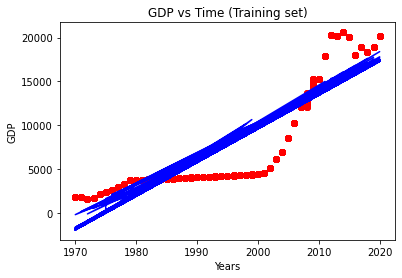

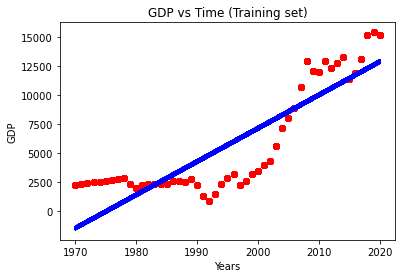

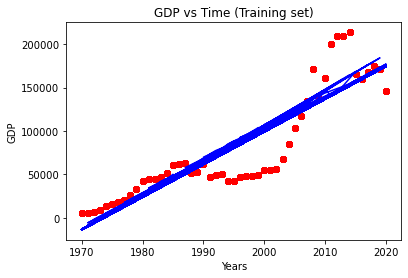

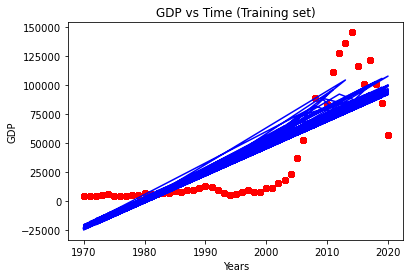

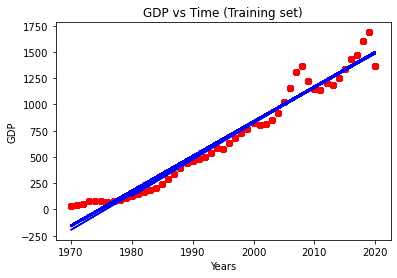

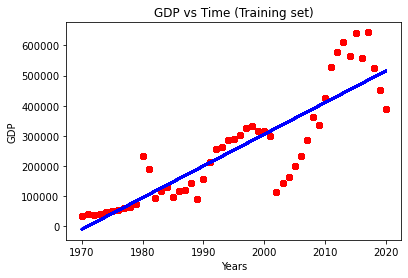

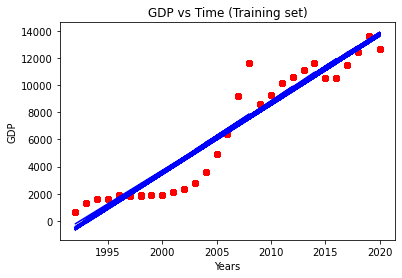

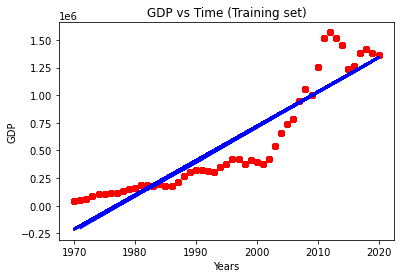

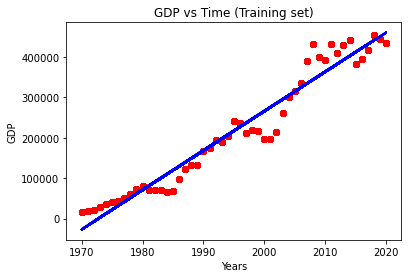

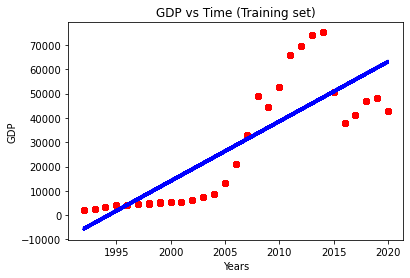

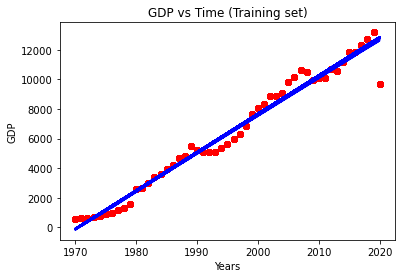

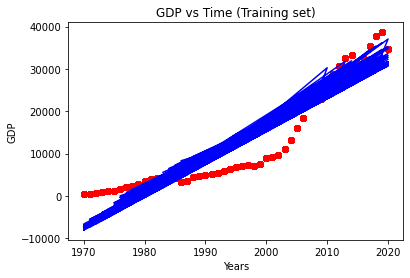

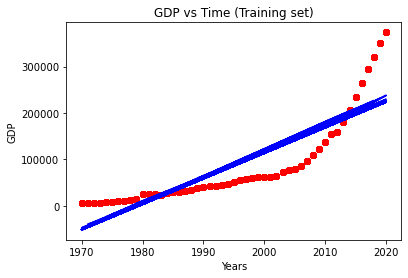

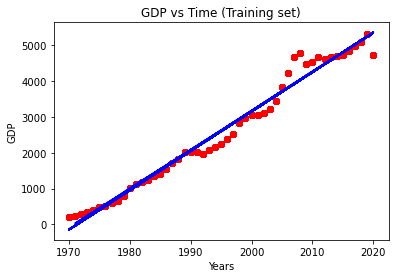

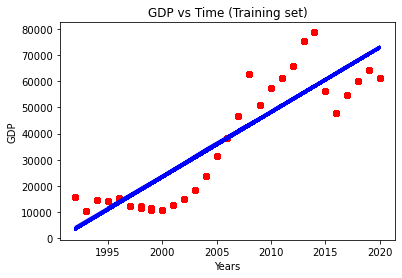

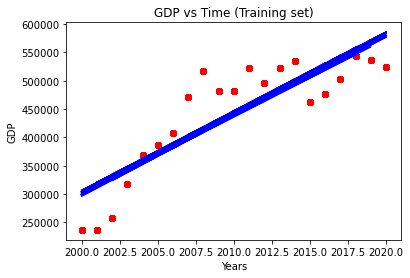

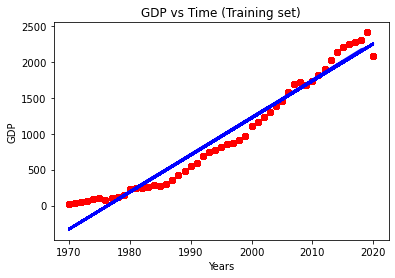

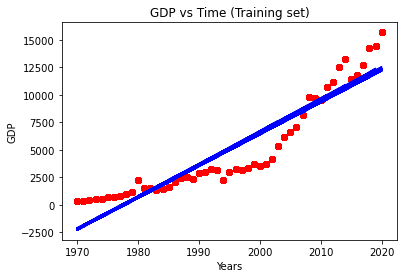

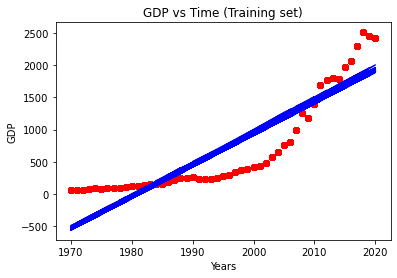

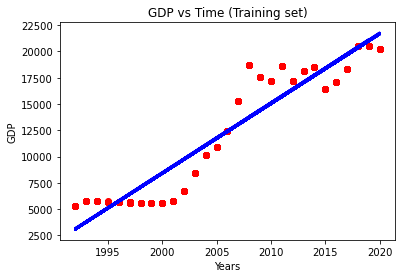

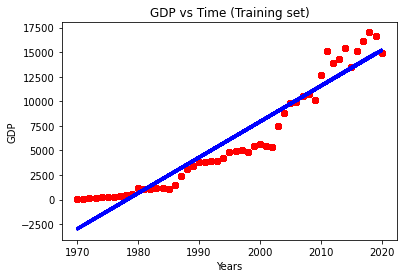

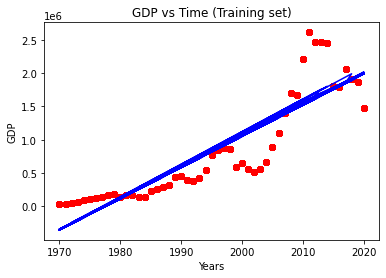

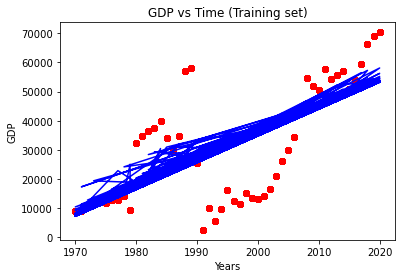

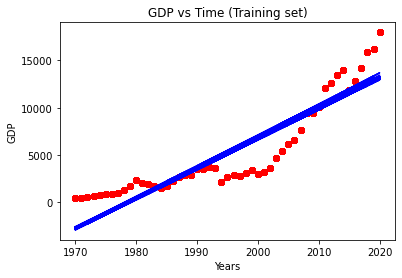

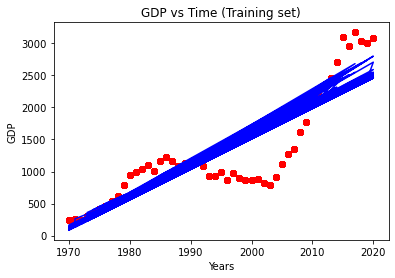

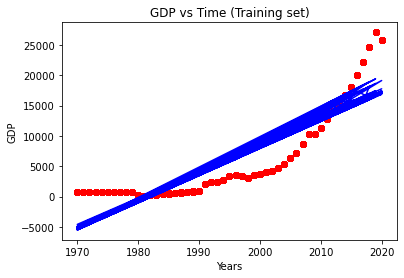

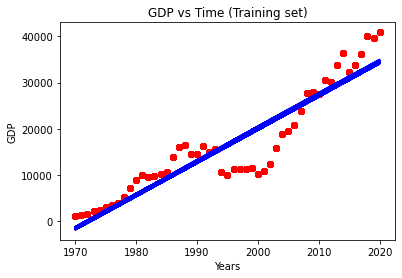

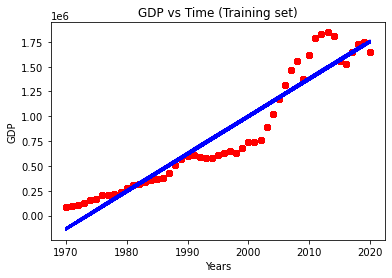

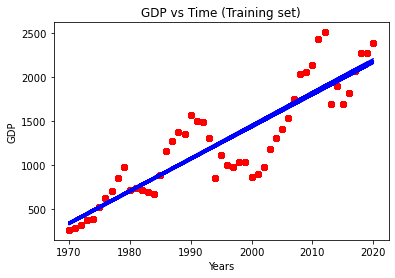

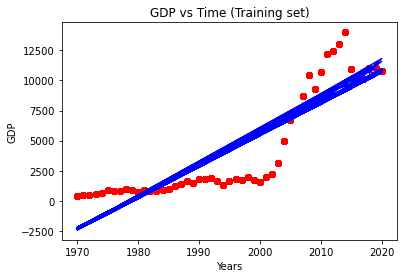

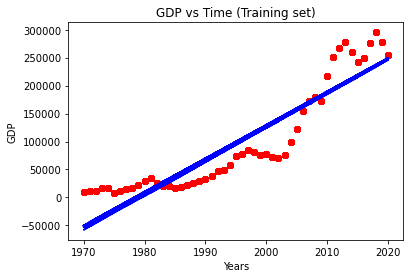

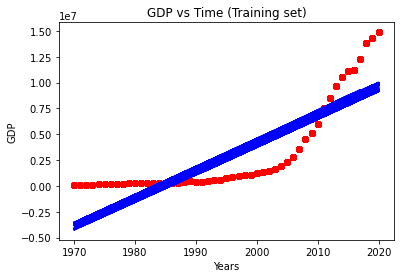

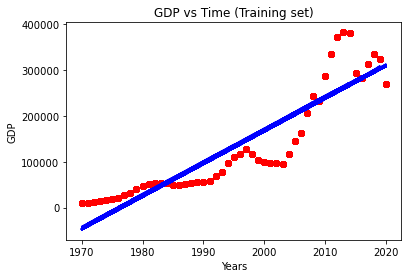

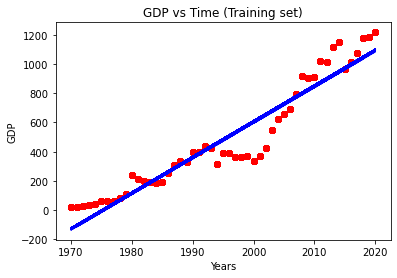

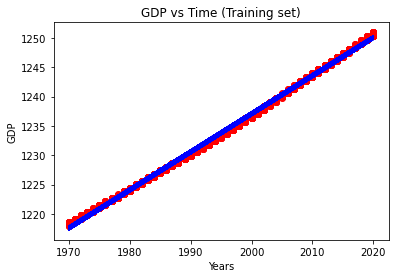

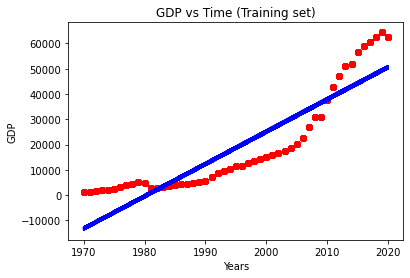

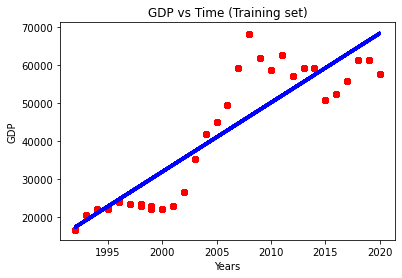

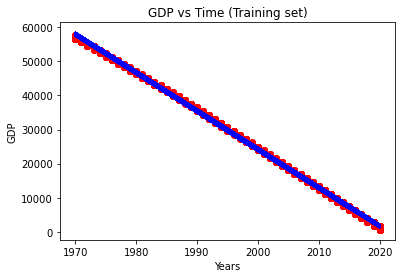

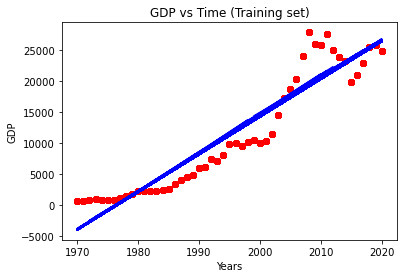

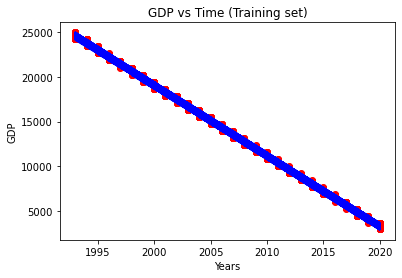

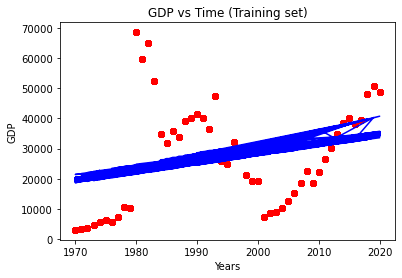

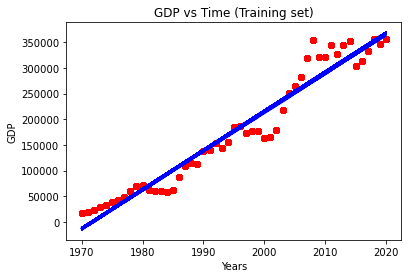

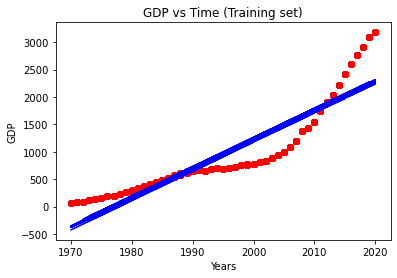

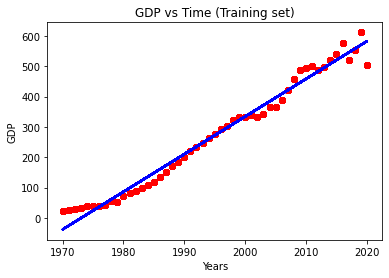

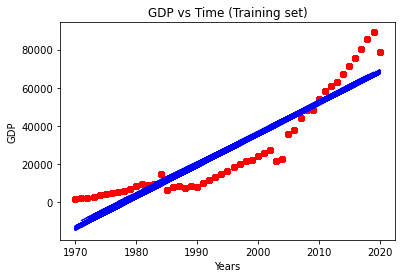

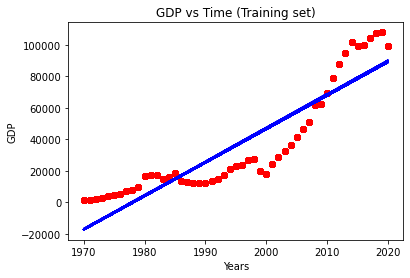

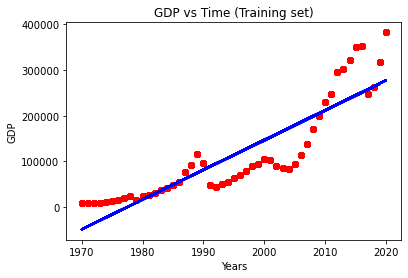

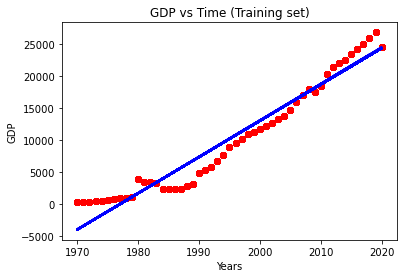

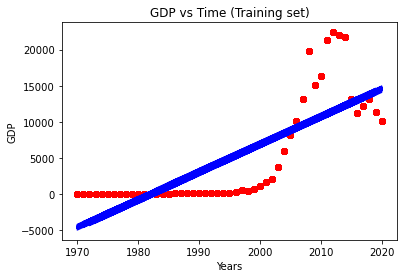

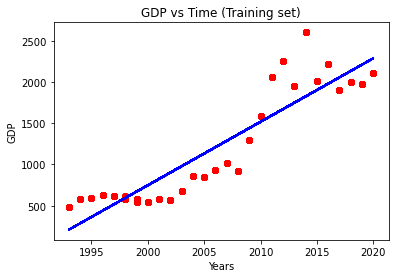

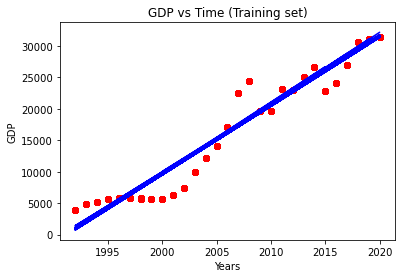

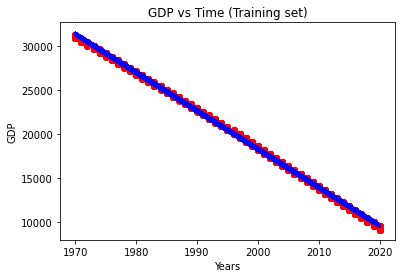

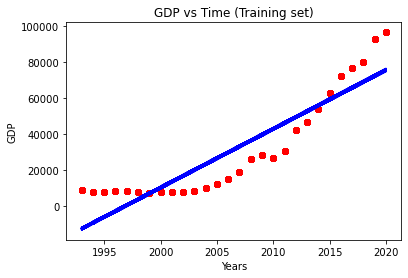

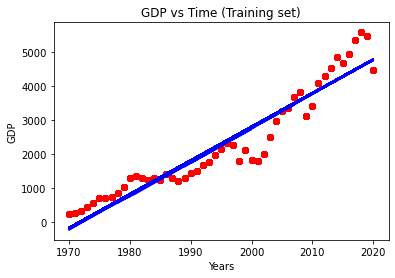

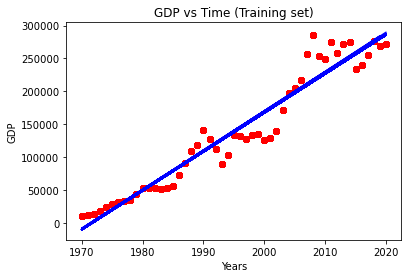

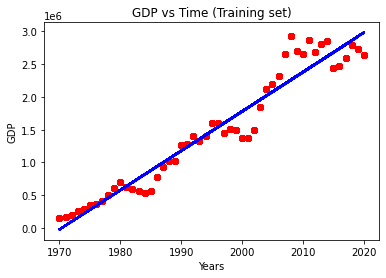

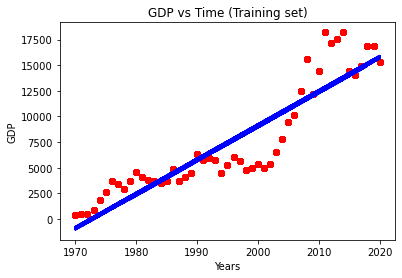

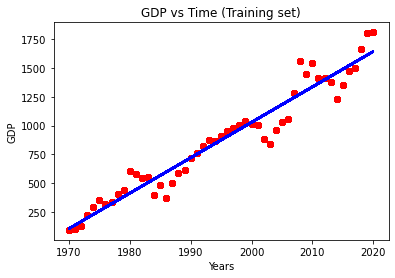

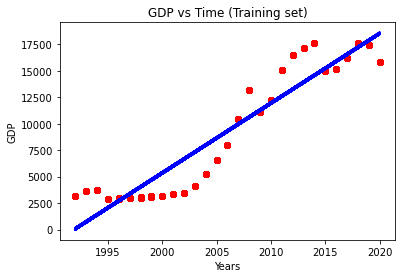

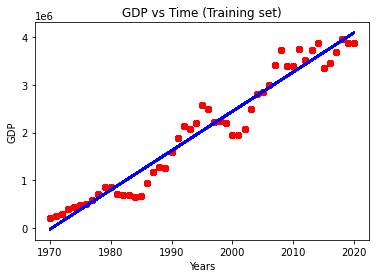

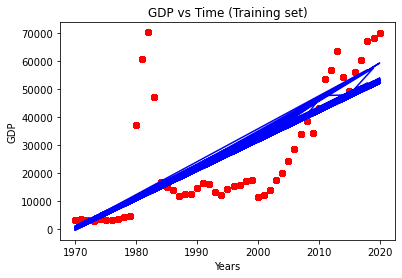

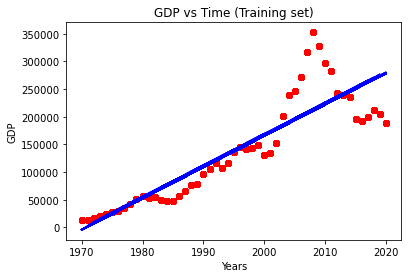

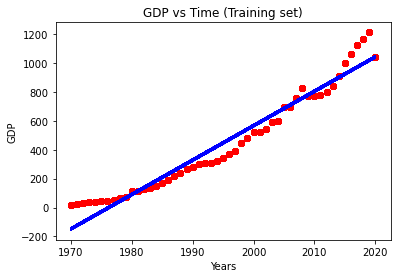

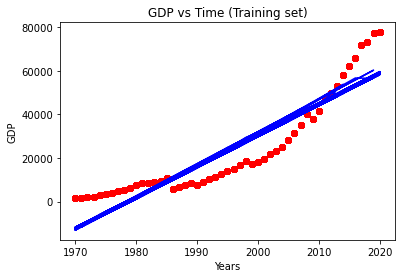

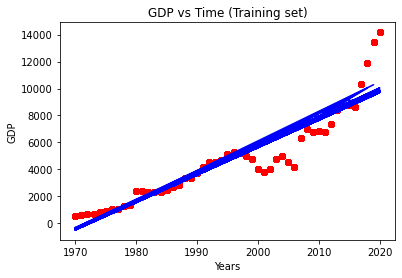

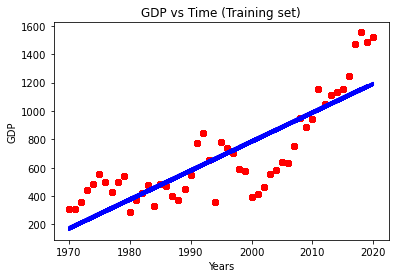

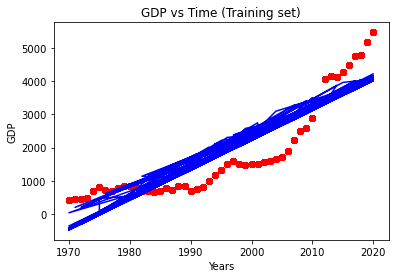

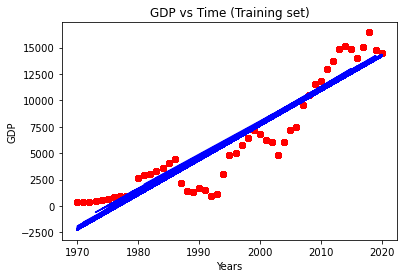

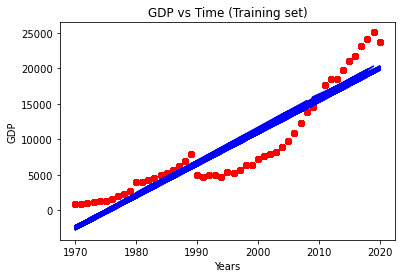

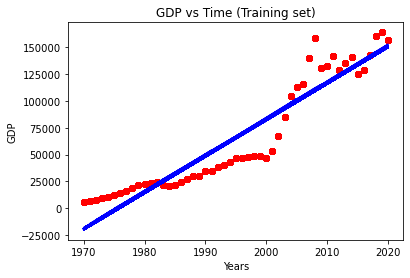

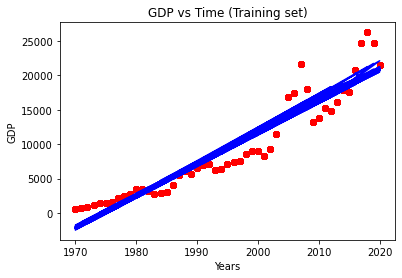

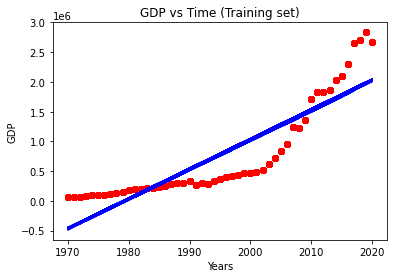

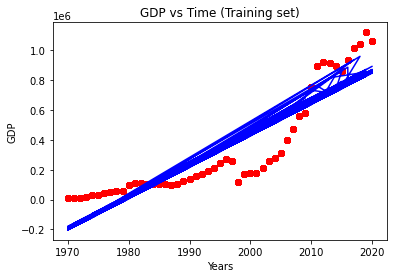

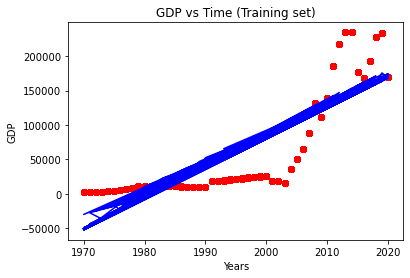

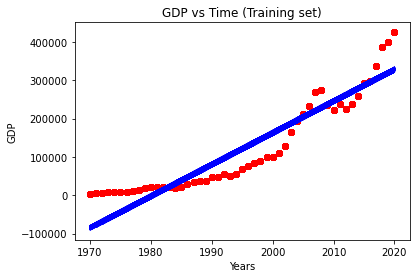

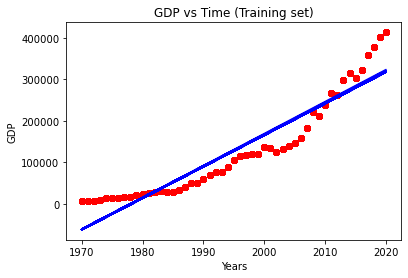

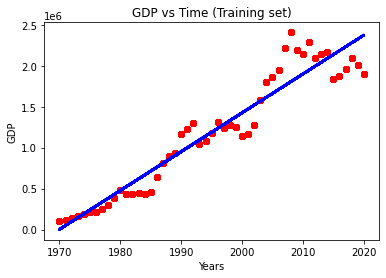

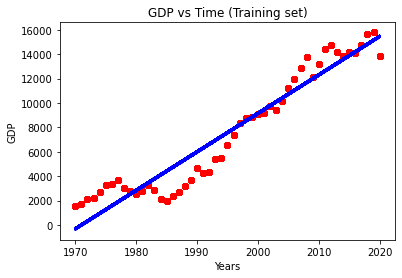

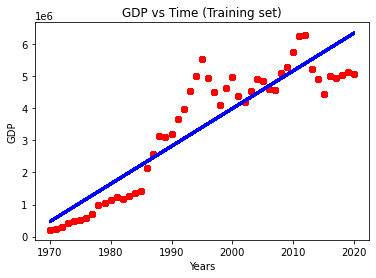

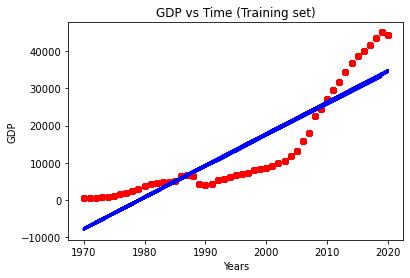

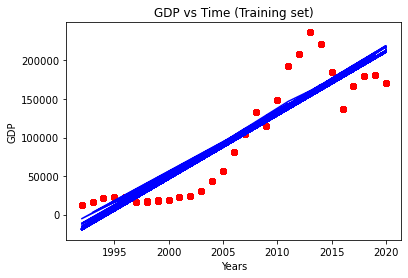

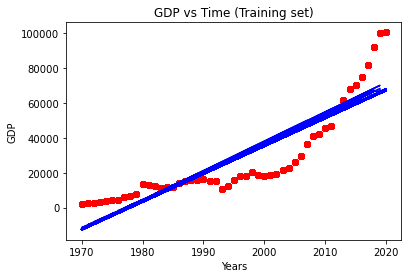

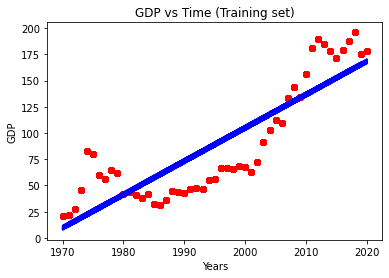

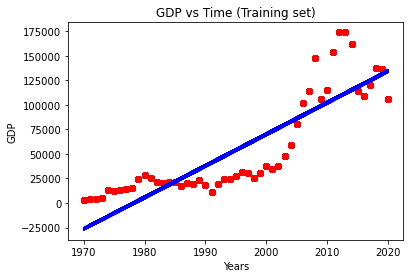

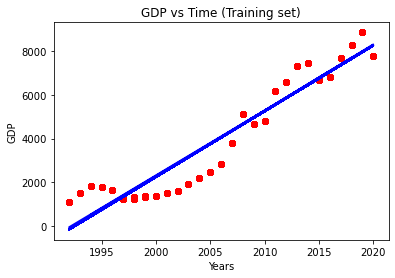

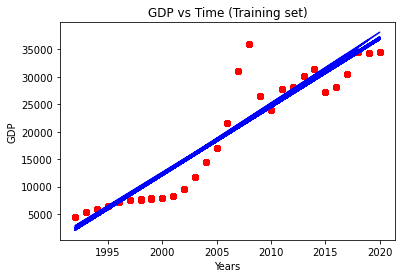

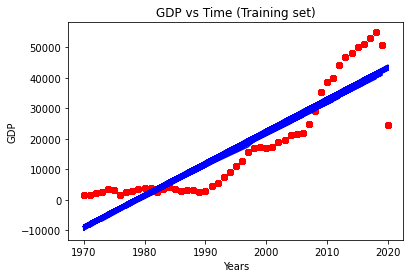

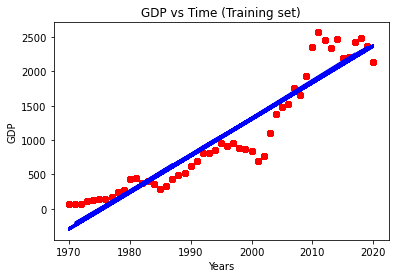

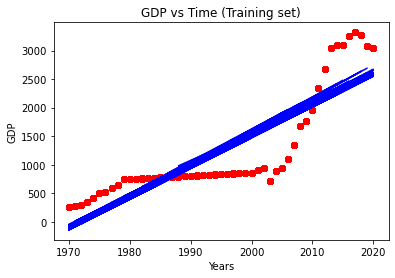

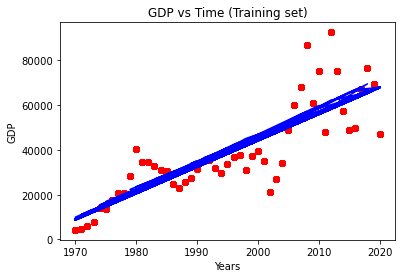

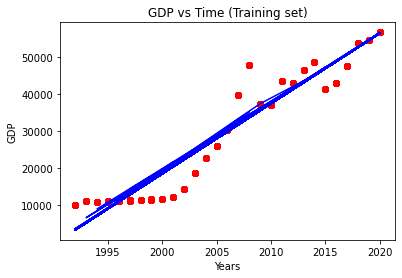

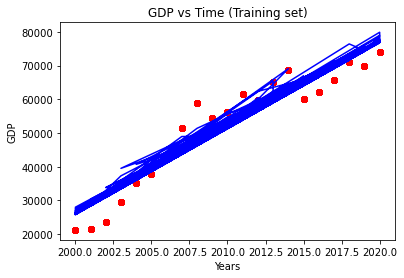

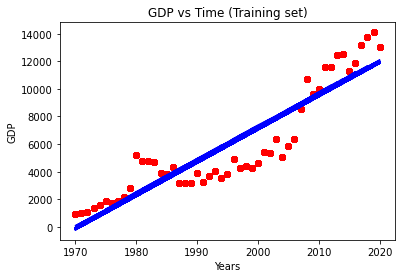

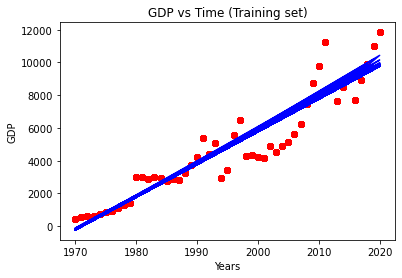

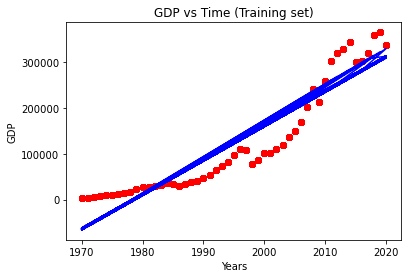

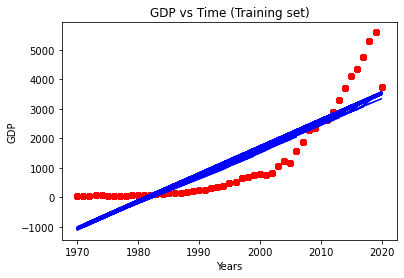

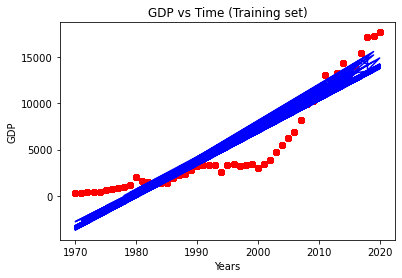

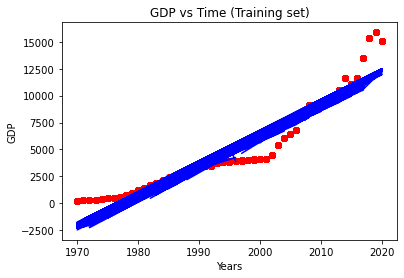

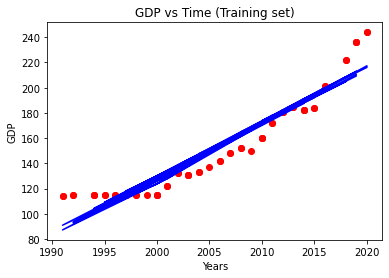

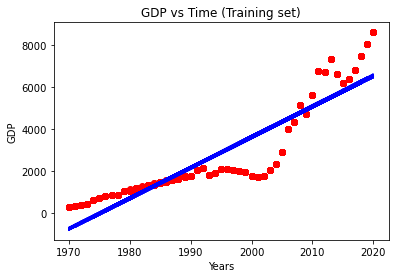

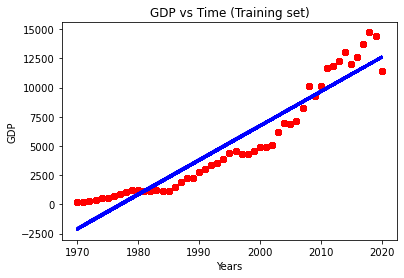

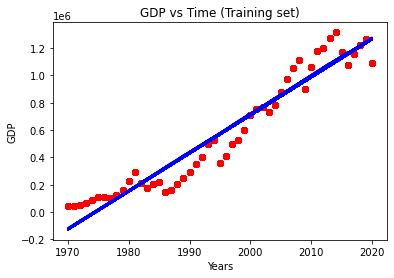

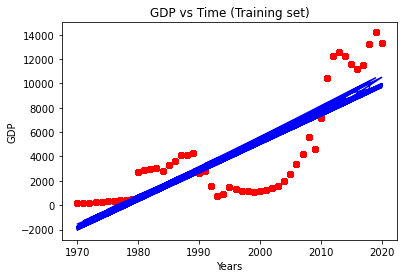

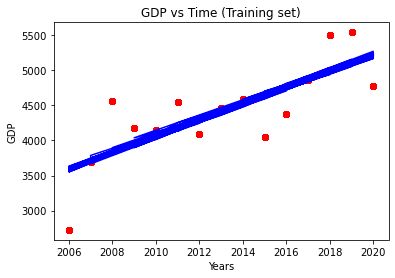

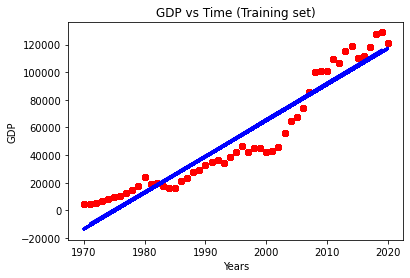

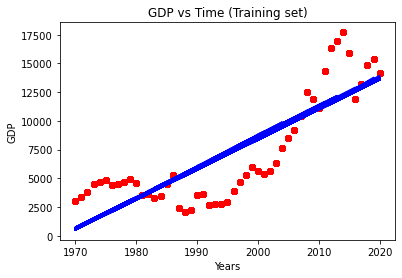

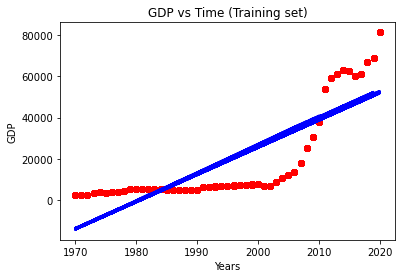

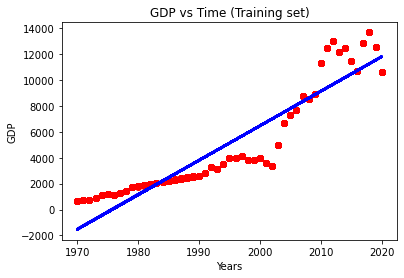

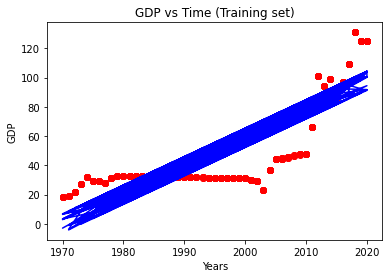

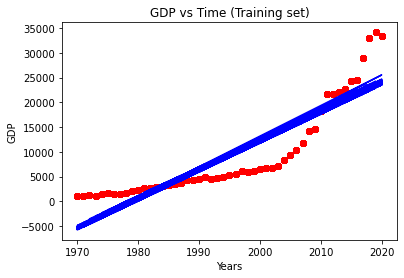

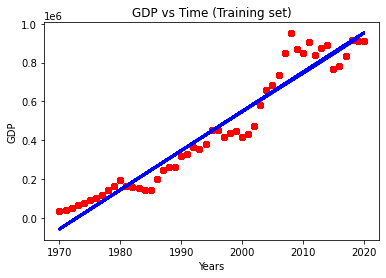

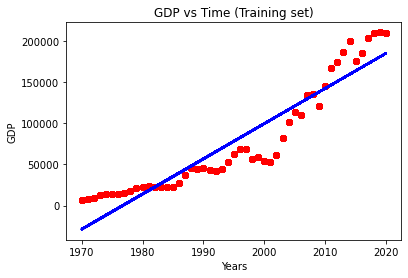

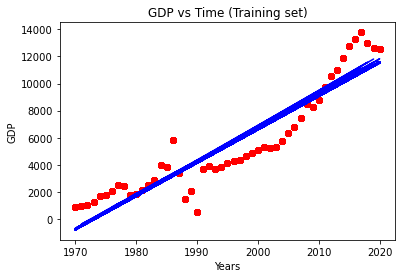

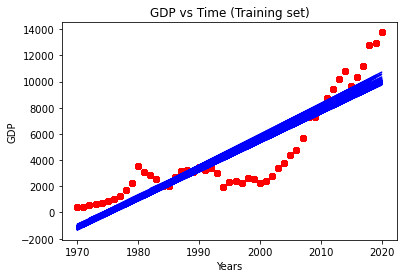

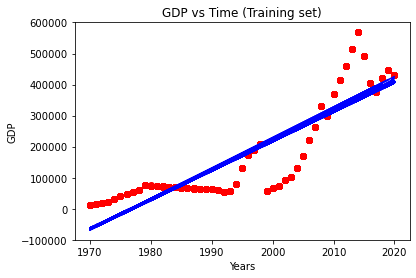

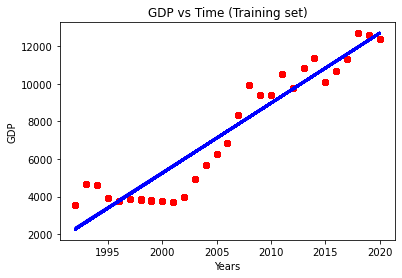

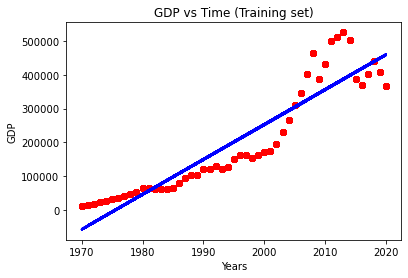

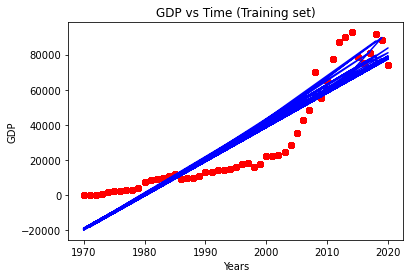

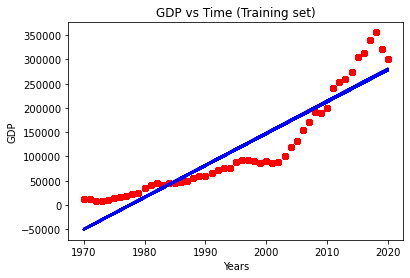

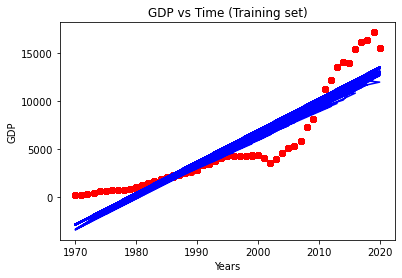

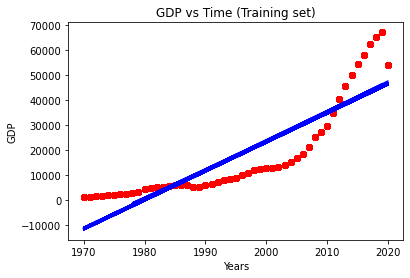

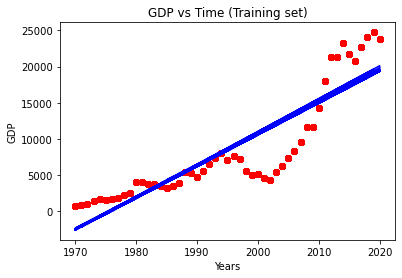

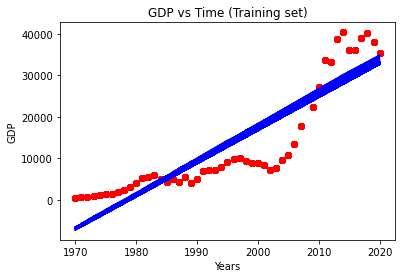

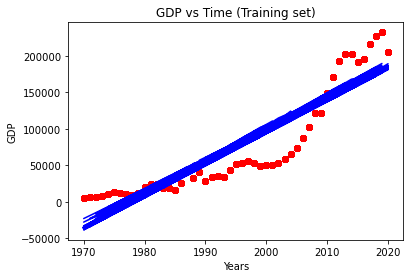

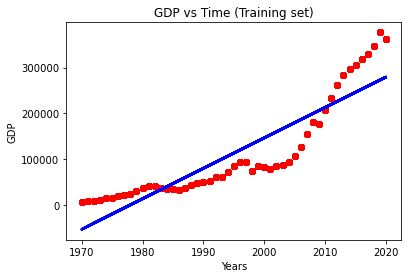

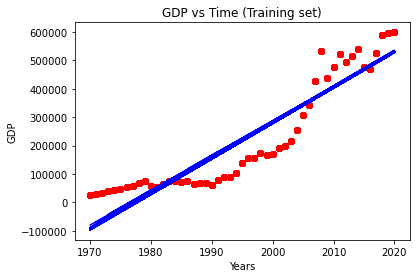

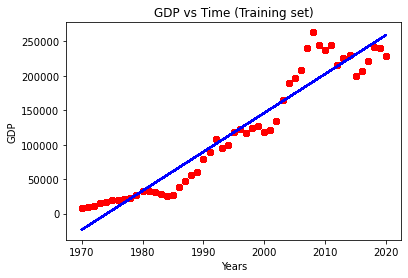

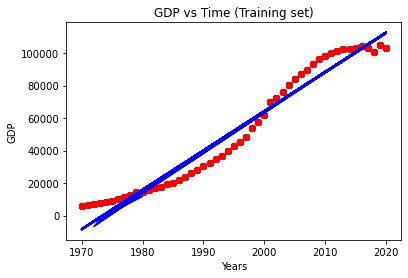

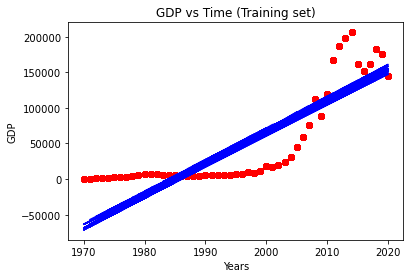

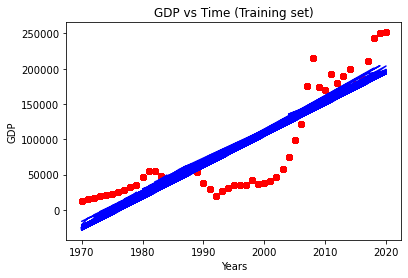

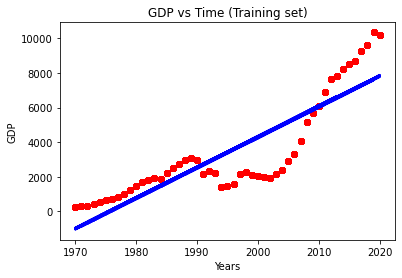

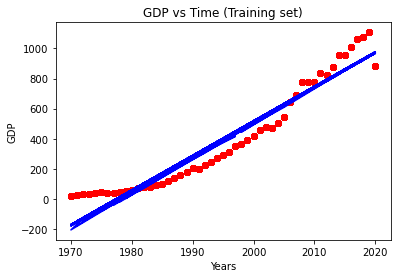

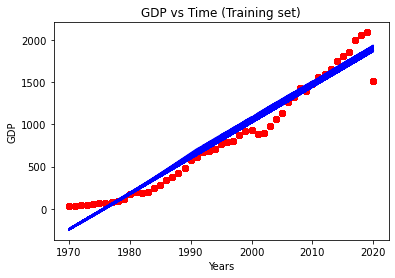

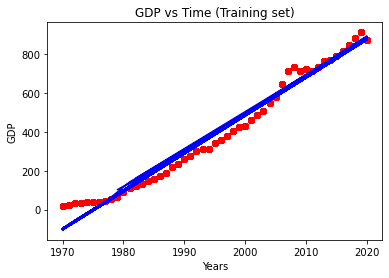

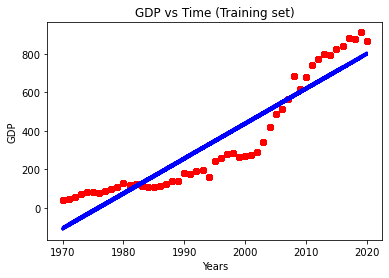

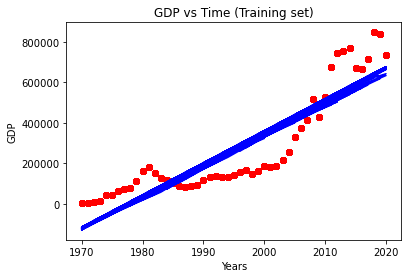

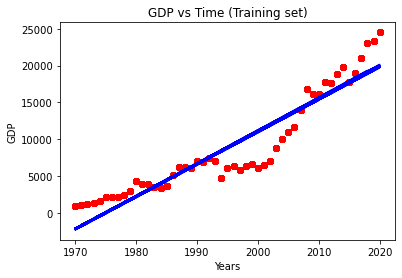

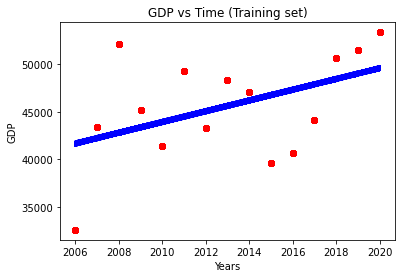

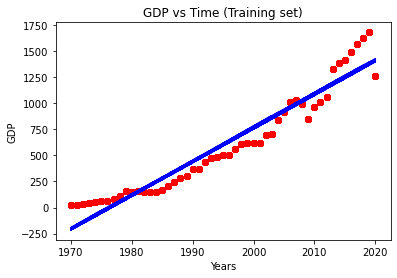

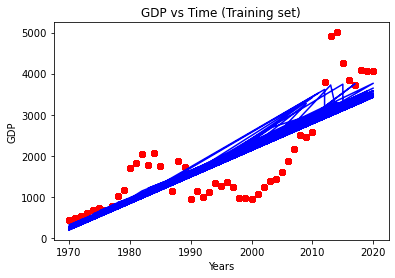

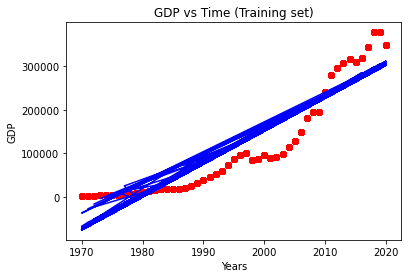

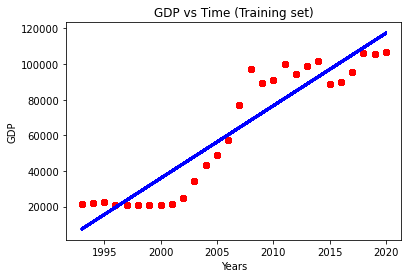

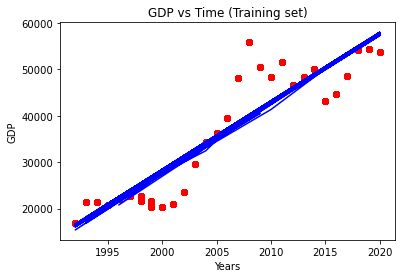

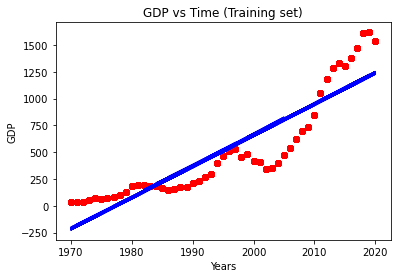

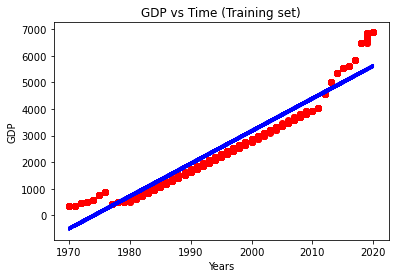

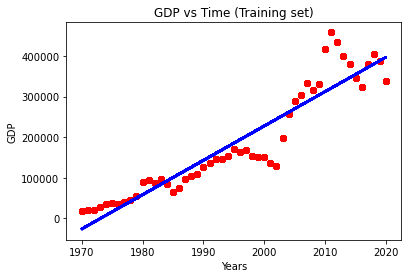

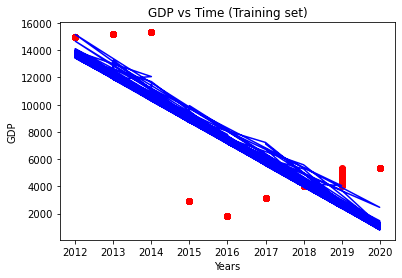

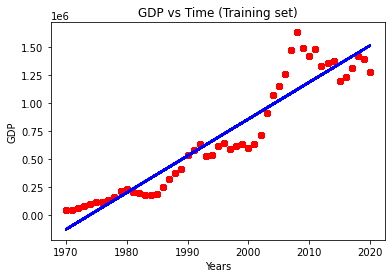

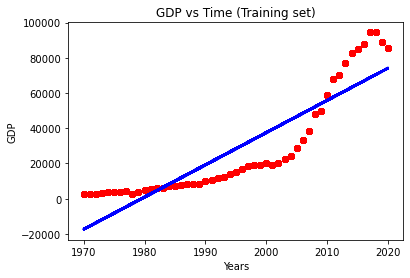

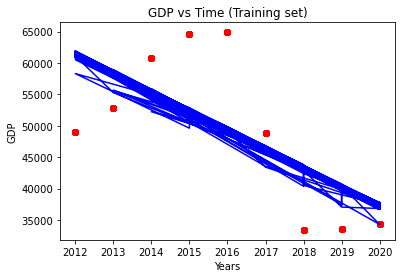

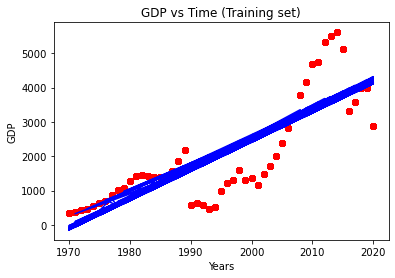

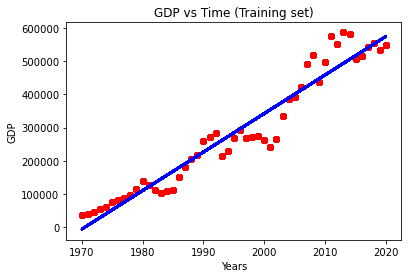

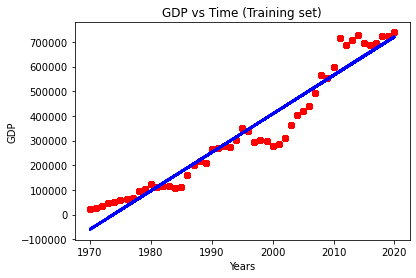

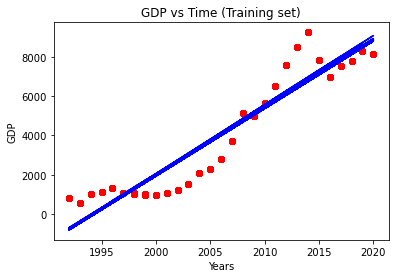

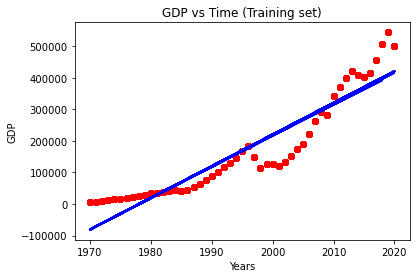

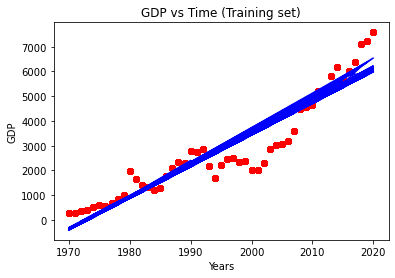

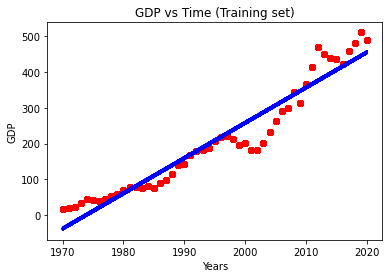

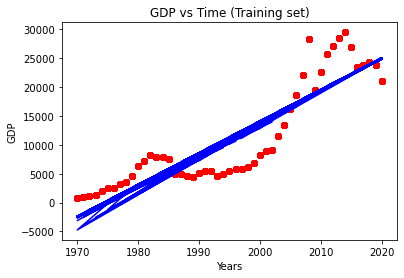

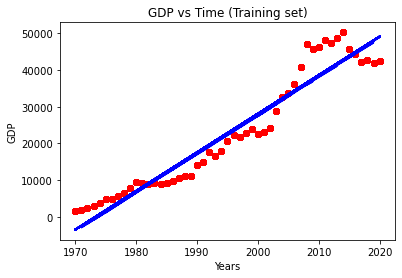

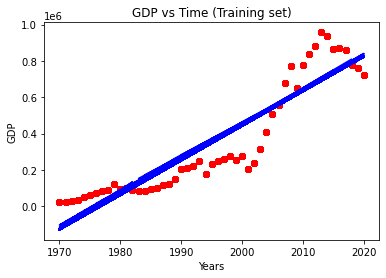

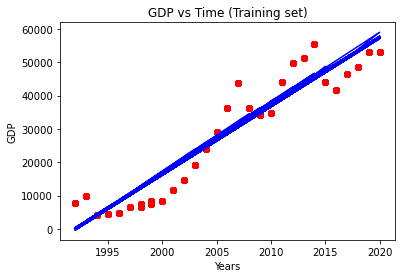

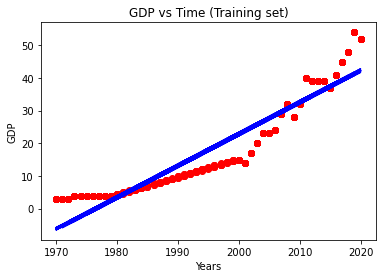

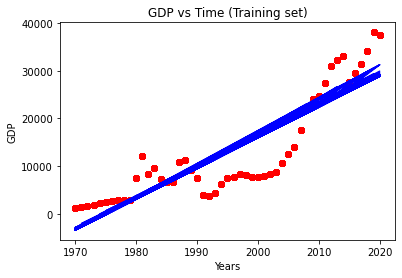

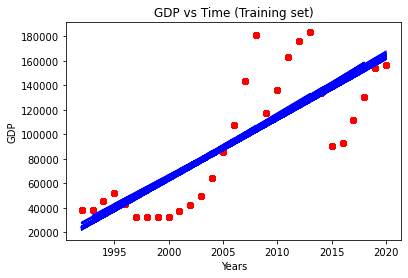

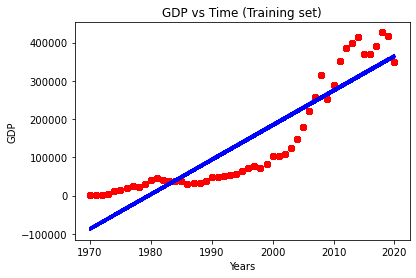

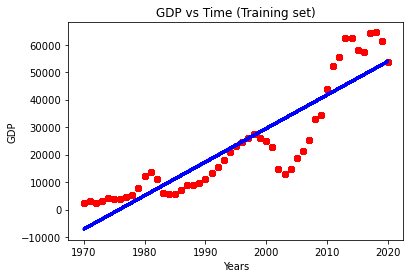

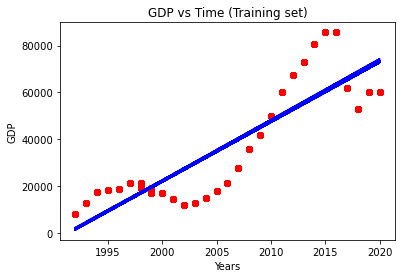

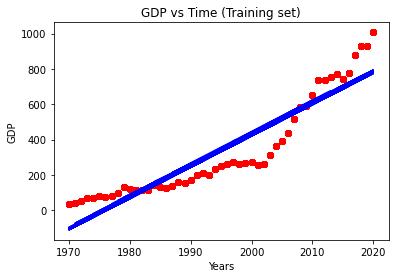

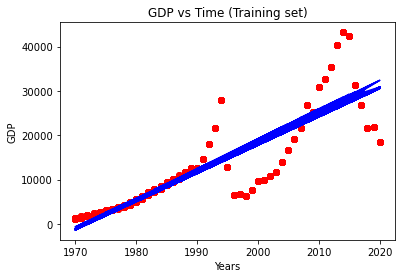

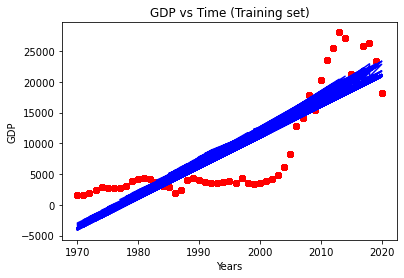

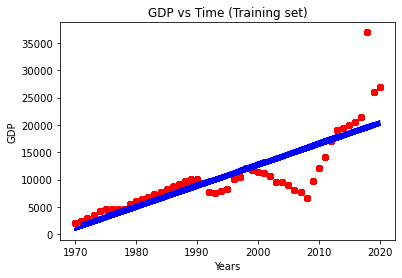

In [86]:
for area in df_gdp['Area'].unique():
    df_gdp_temp = df_gdp[df_gdp['Area'] == area]
    X = df_gdp_temp.iloc[:, :-1].values
    y = df_gdp_temp.iloc[:, -1].values

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    plt.scatter(X_train[:,3], y_train, color = 'red')
    plt.plot(X_train[:,3], regressor.predict(X_train), color = 'blue')
    plt.title('GDP vs Time (Training set)')
    plt.xlabel('Years')
    plt.ylabel('GDP')
    plt.show()

### IDH

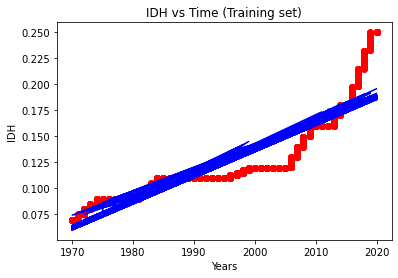

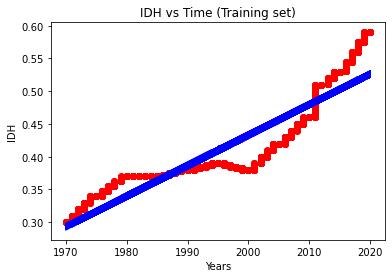

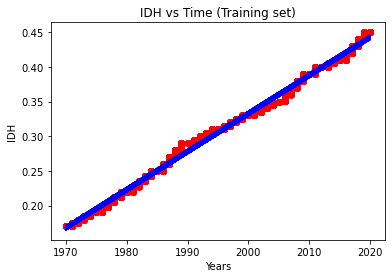

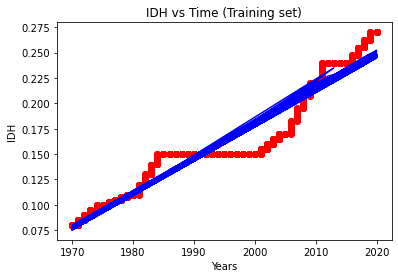

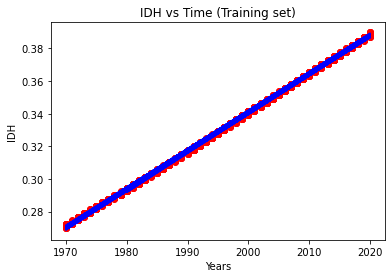

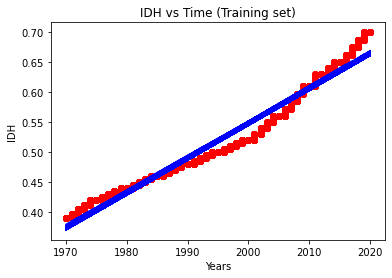

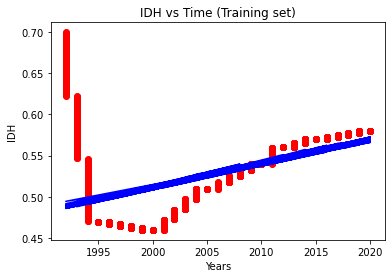

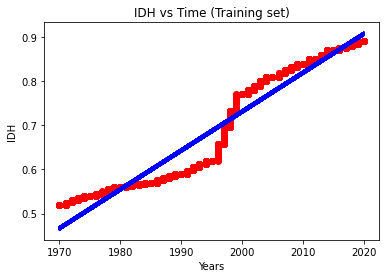

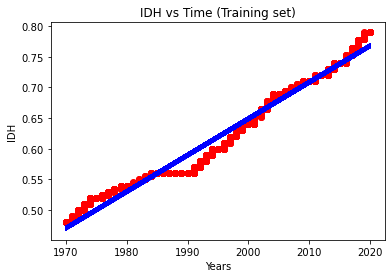

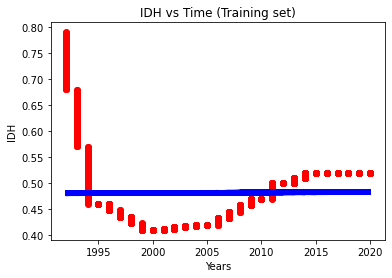

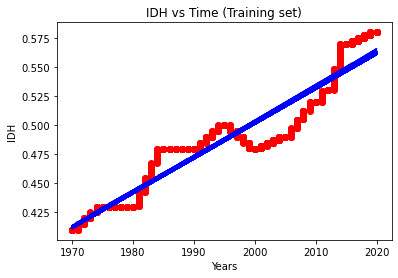

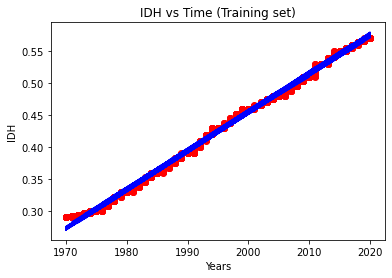

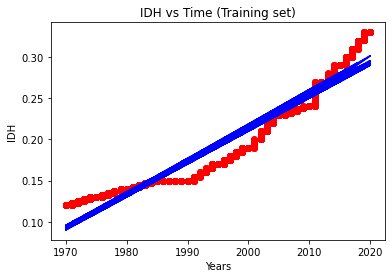

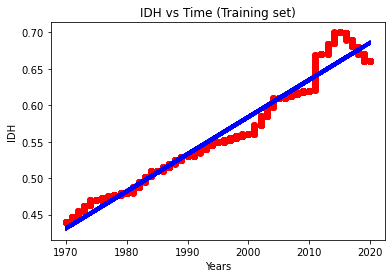

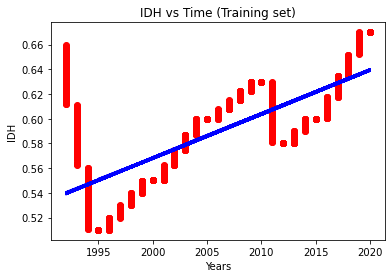

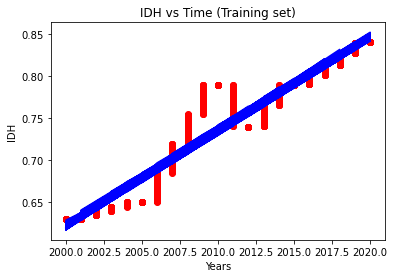

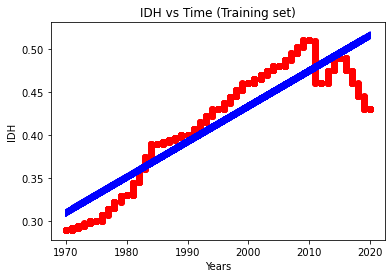

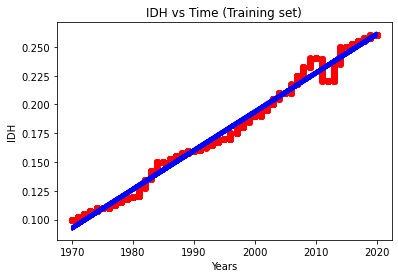

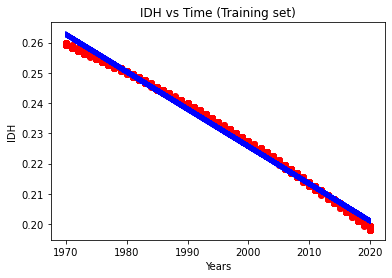

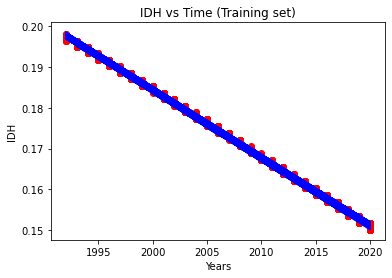

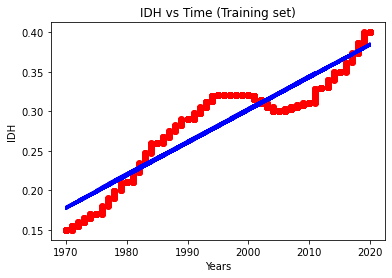

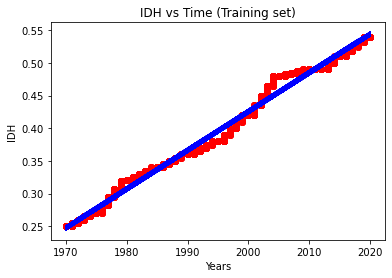

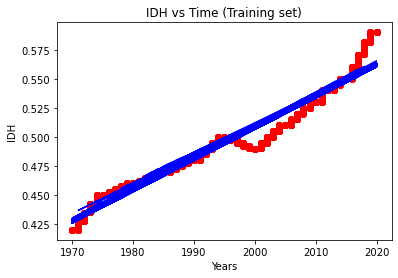

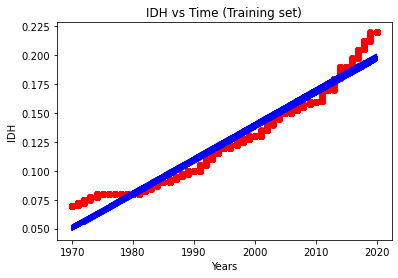

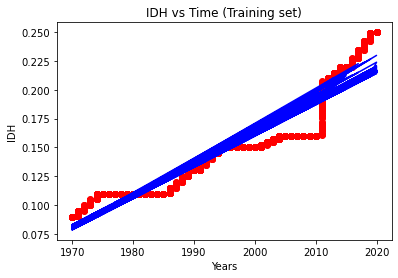

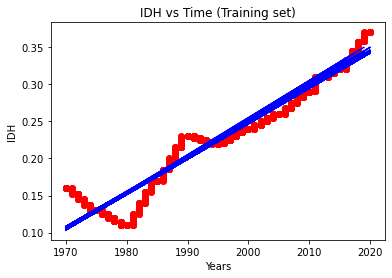

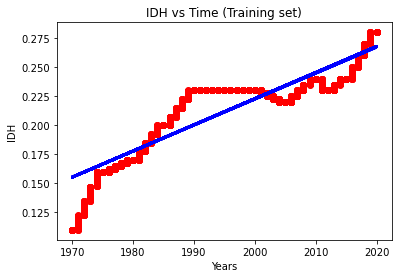

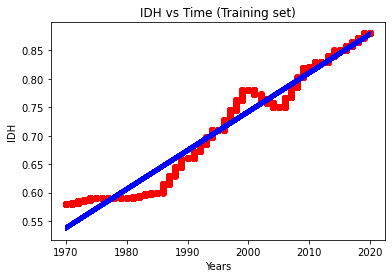

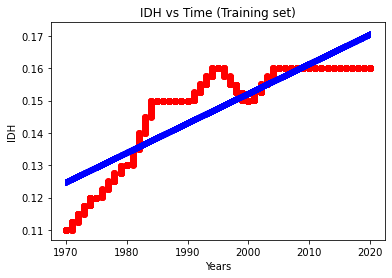

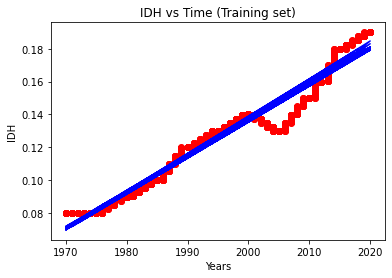

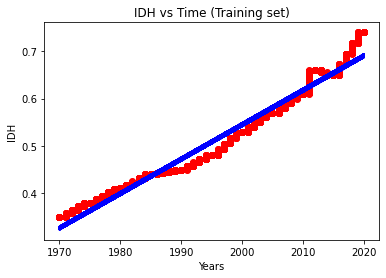

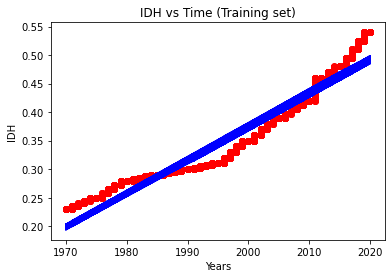

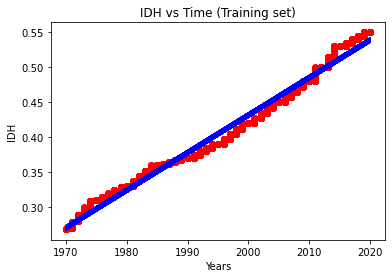

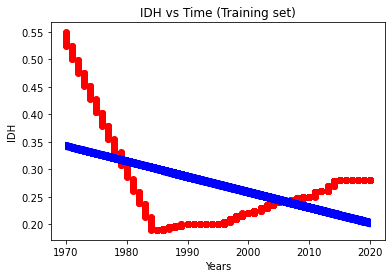

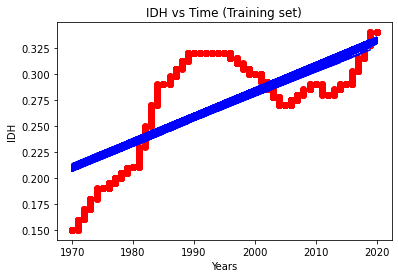

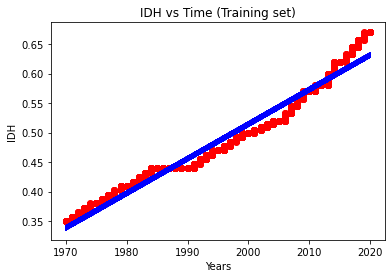

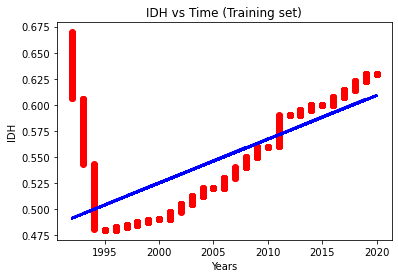

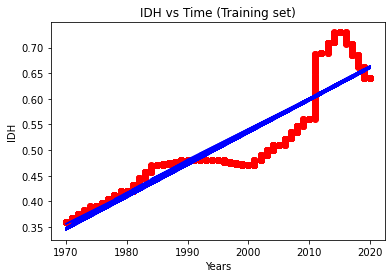

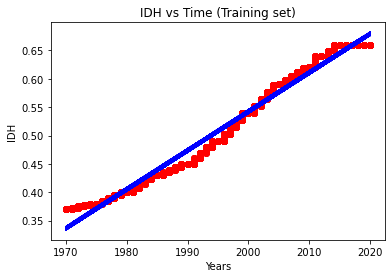

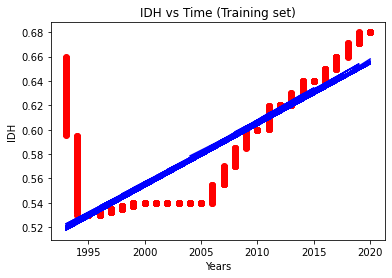

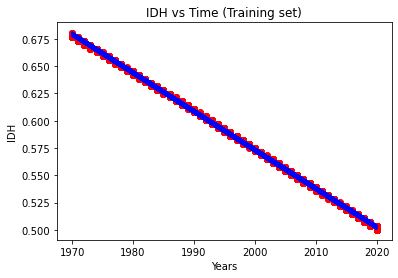

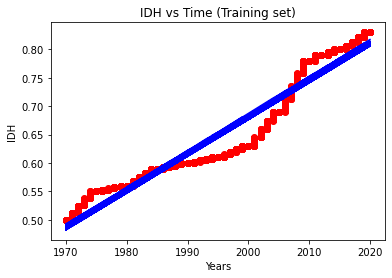

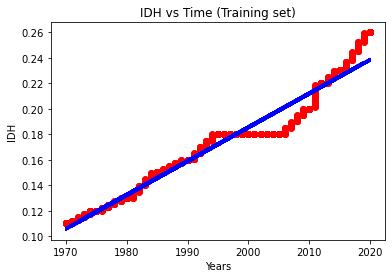

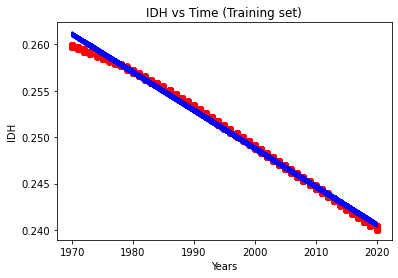

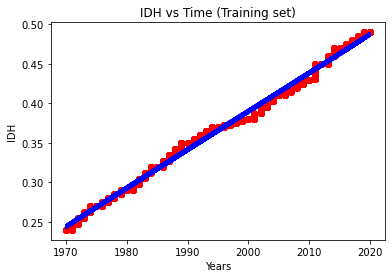

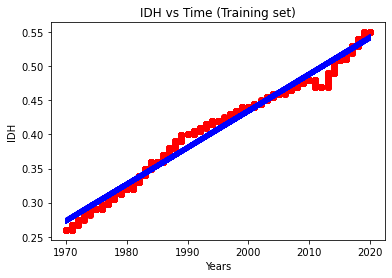

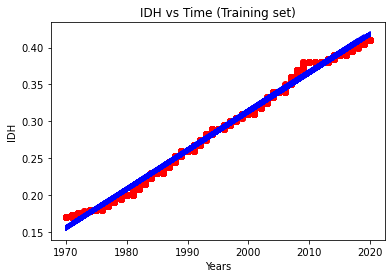

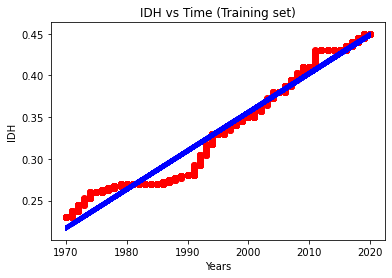

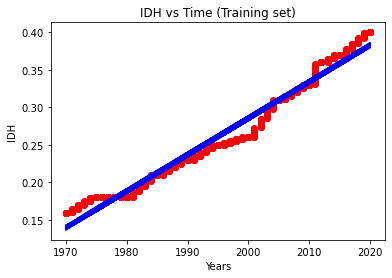

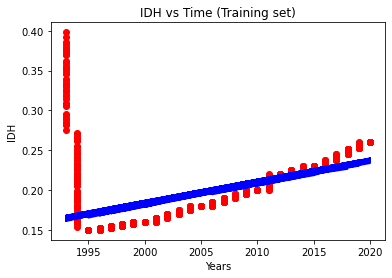

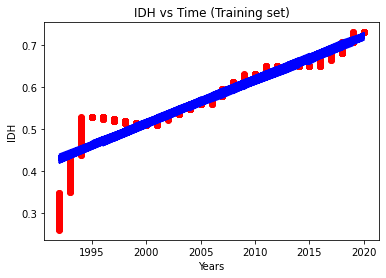

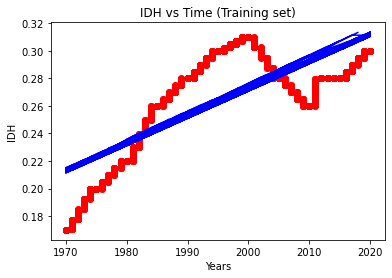

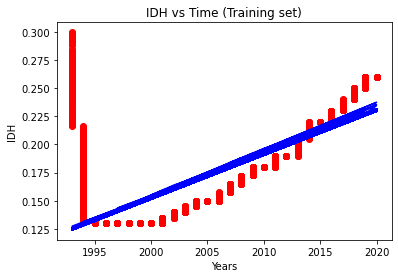

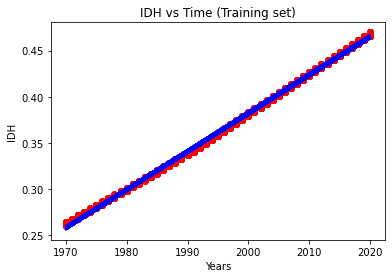

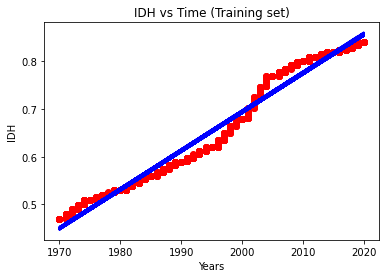

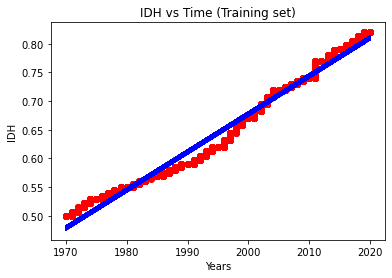

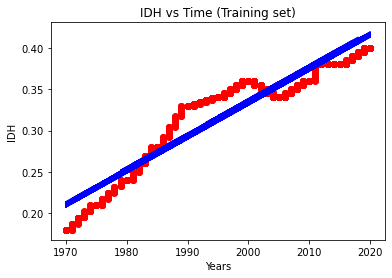

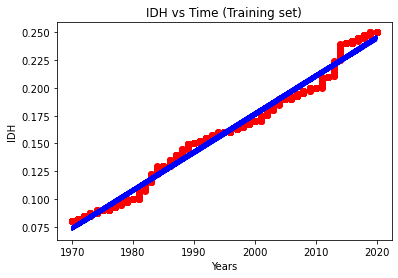

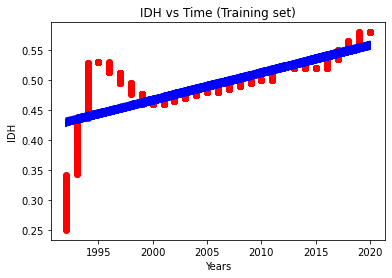

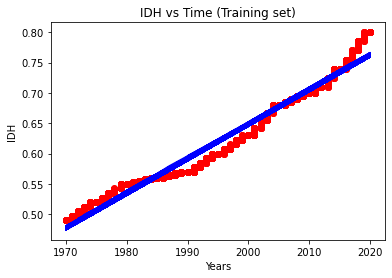

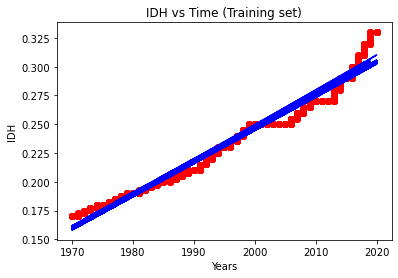

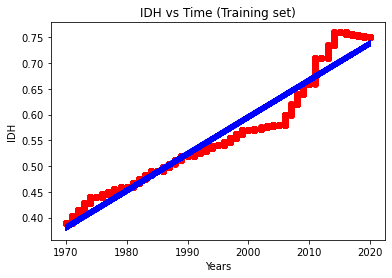

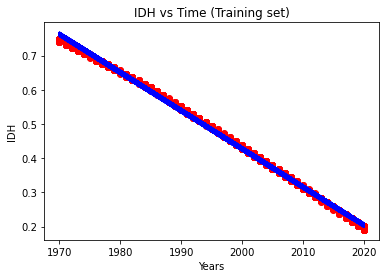

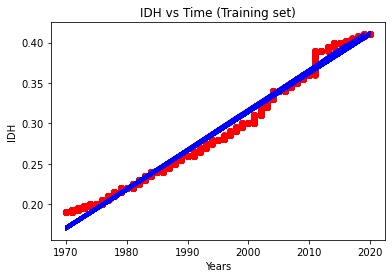

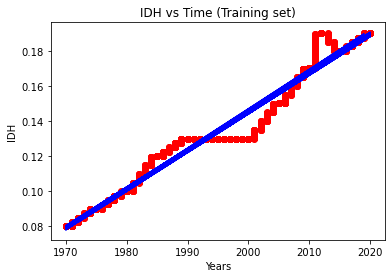

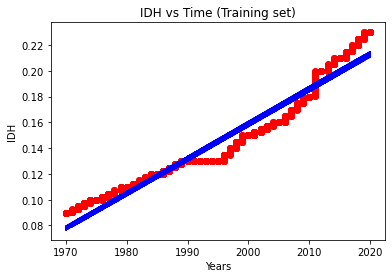

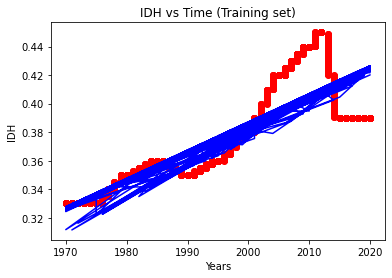

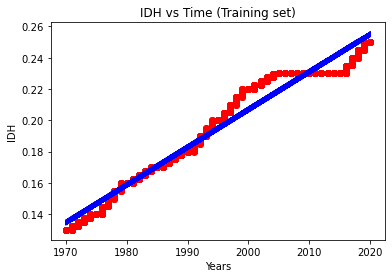

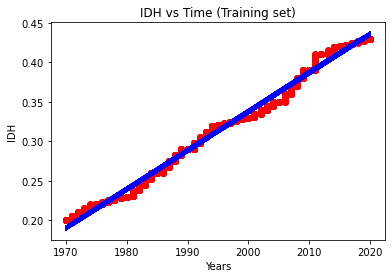

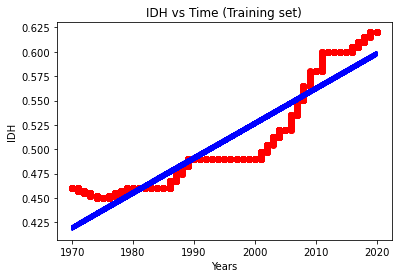

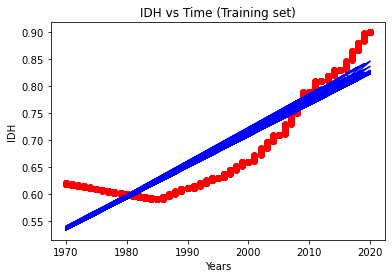

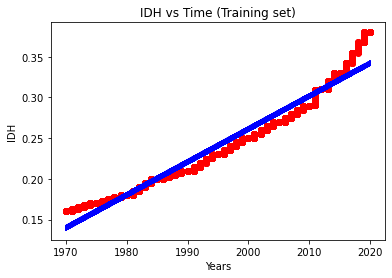

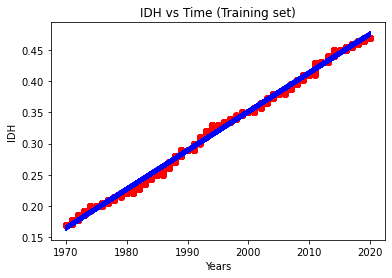

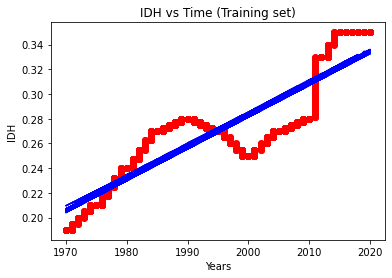

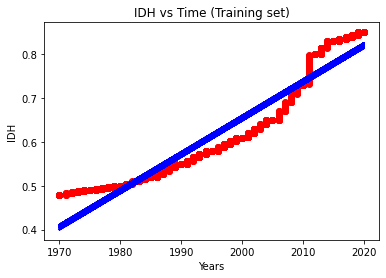

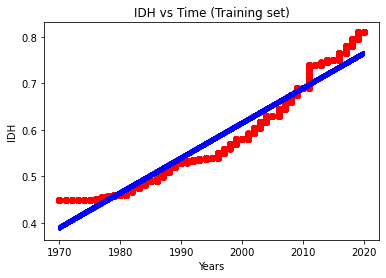

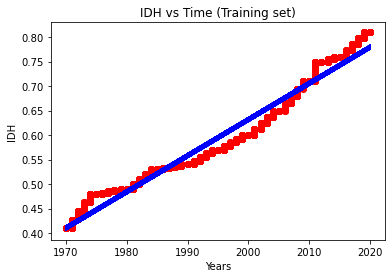

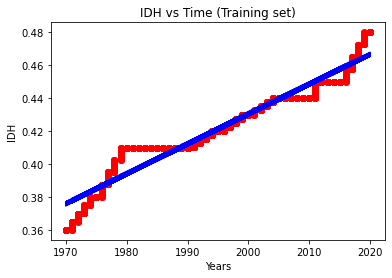

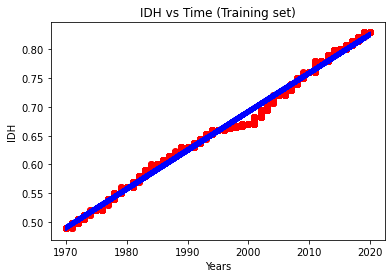

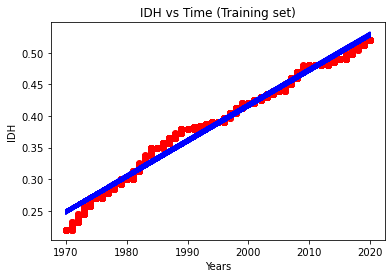

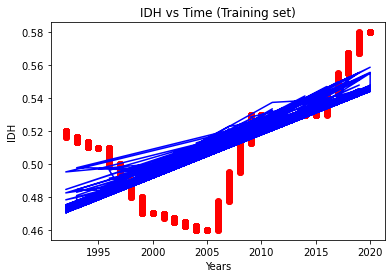

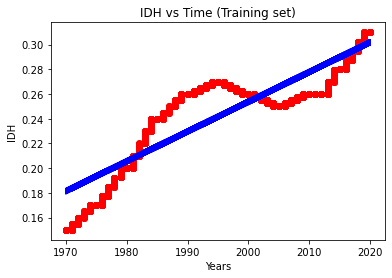

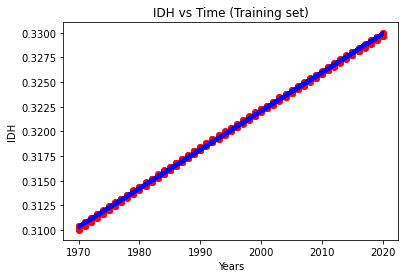

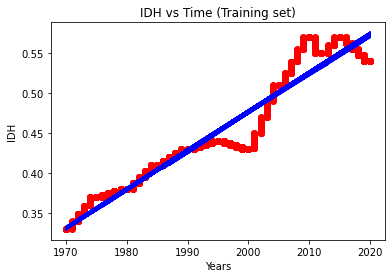

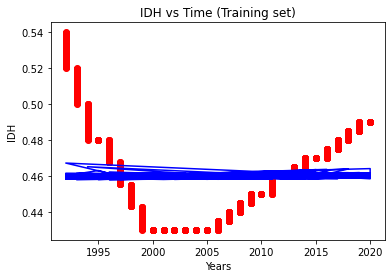

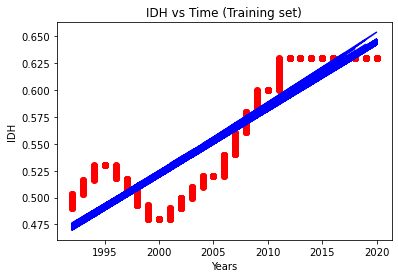

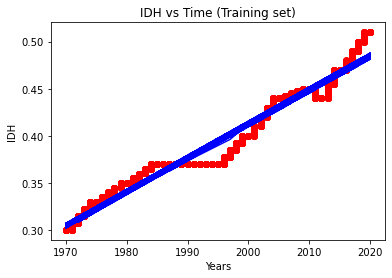

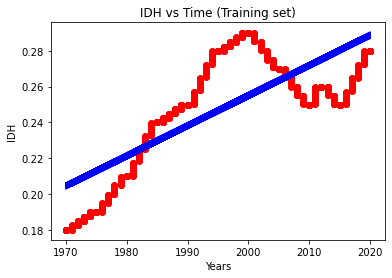

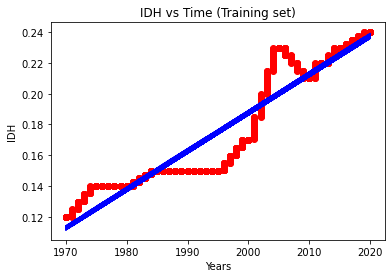

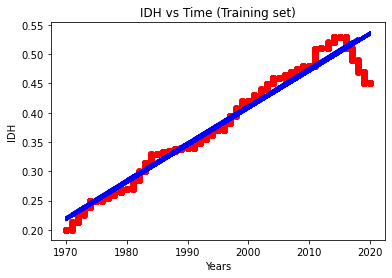

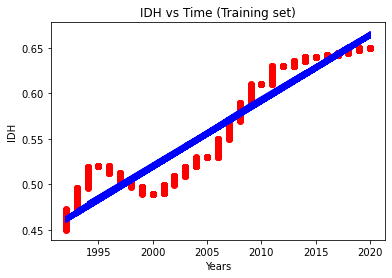

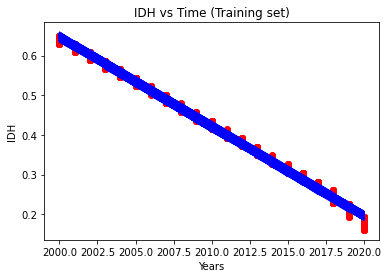

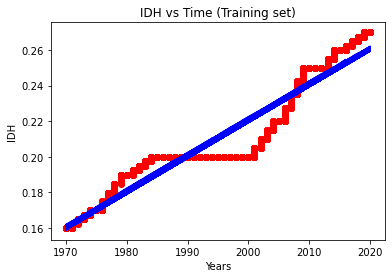

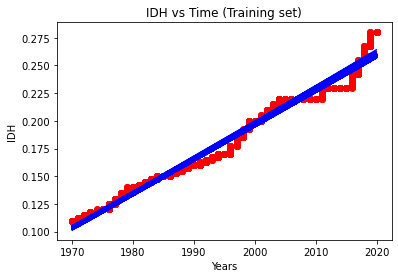

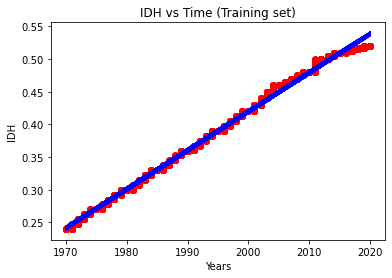

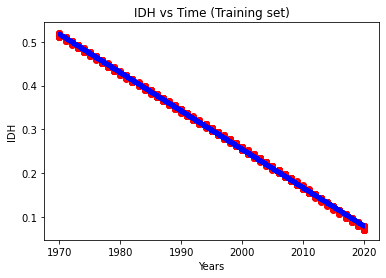

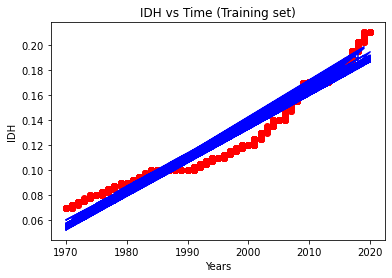

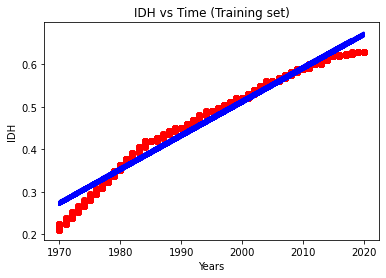

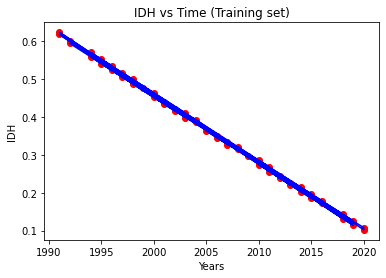

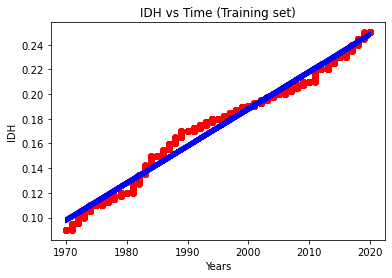

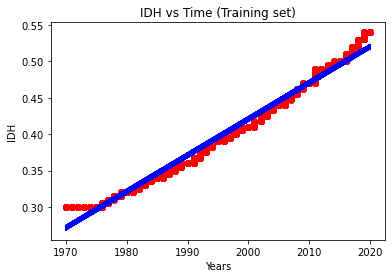

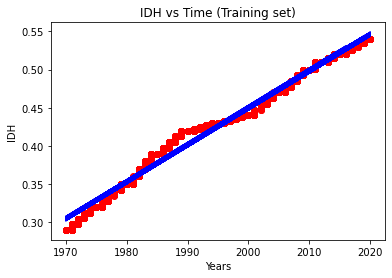

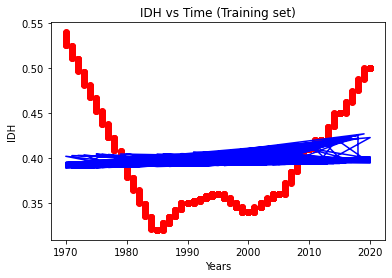

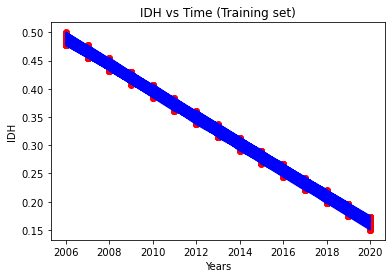

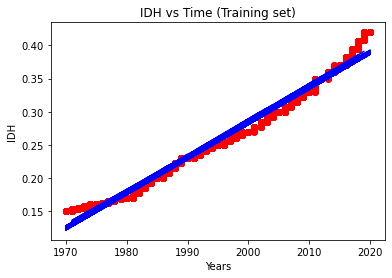

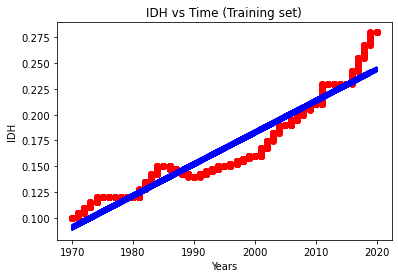

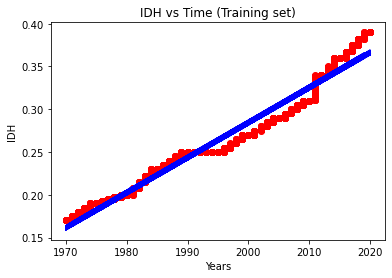

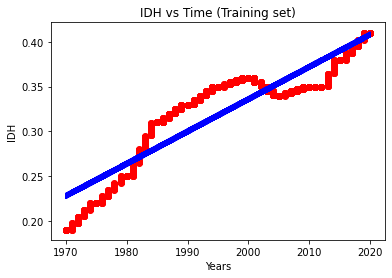

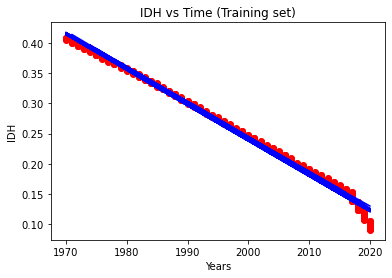

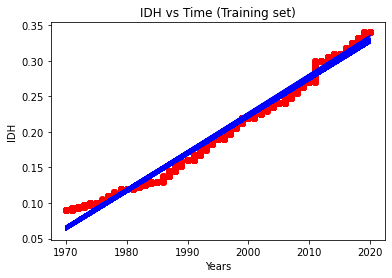

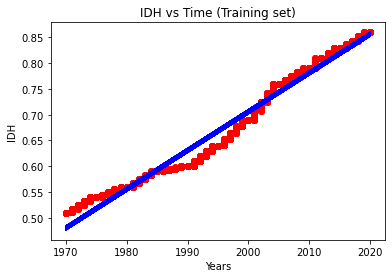

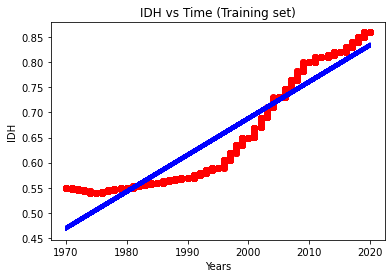

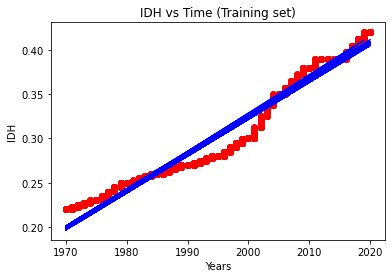

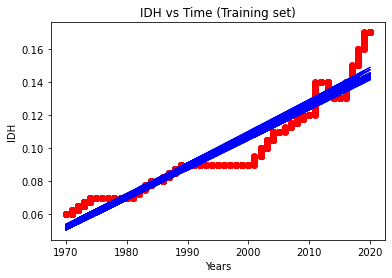

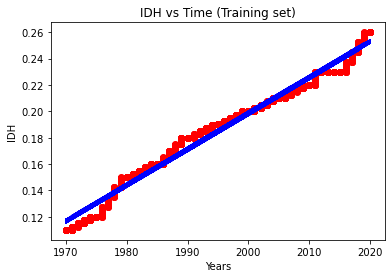

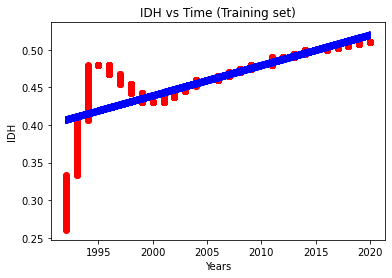

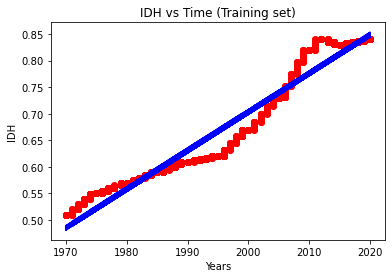

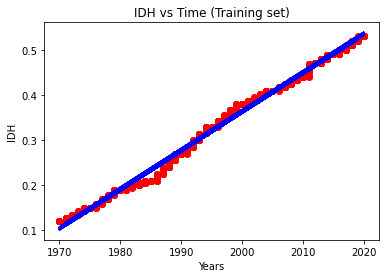

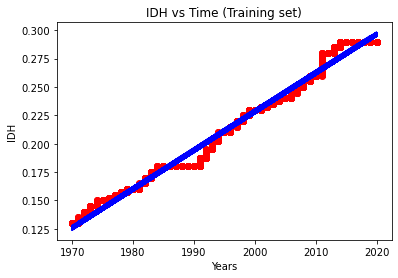

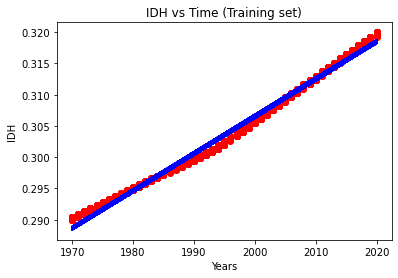

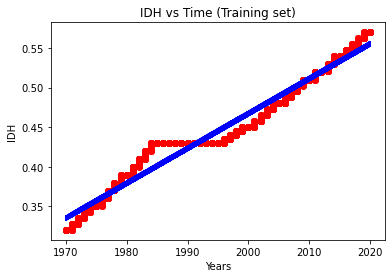

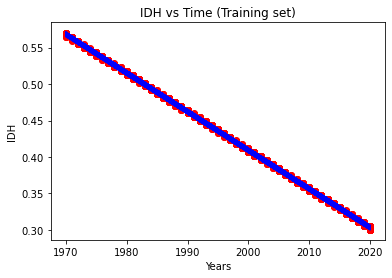

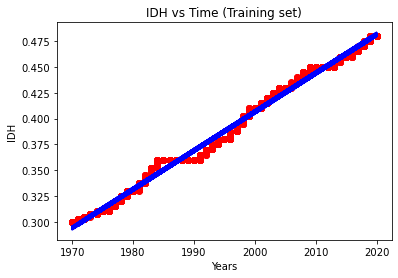

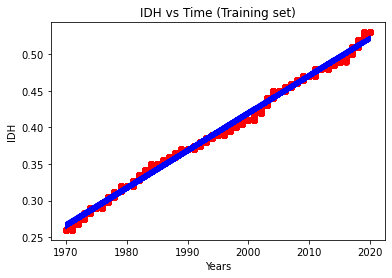

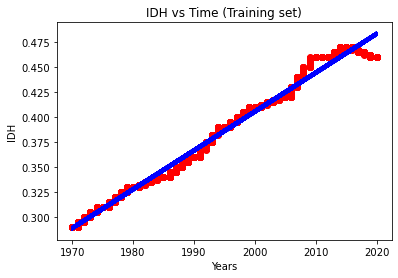

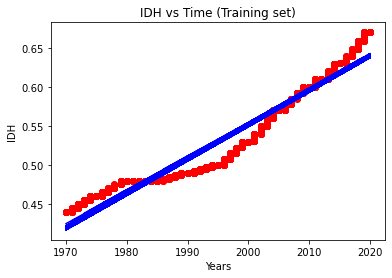

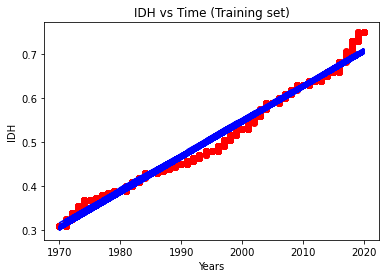

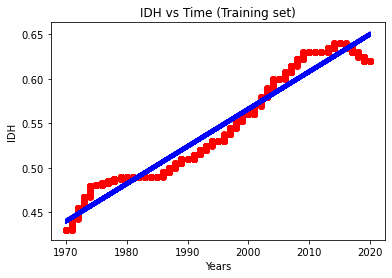

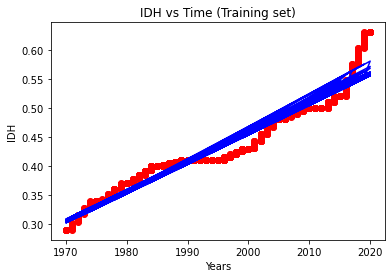

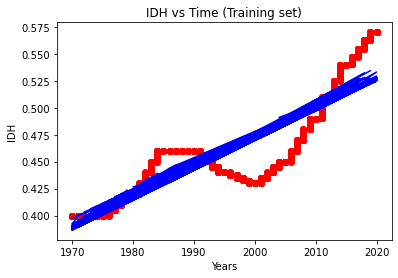

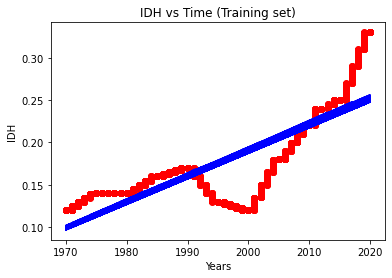

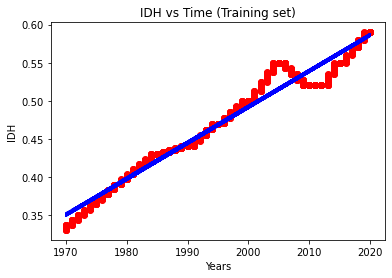

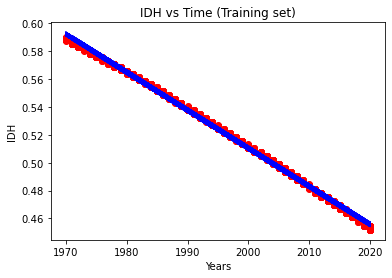

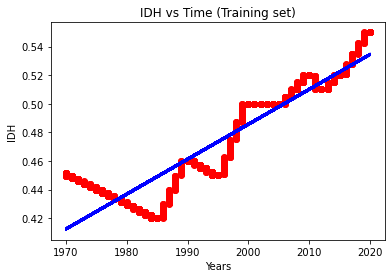

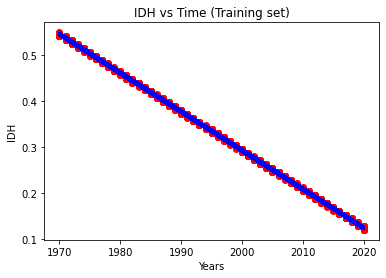

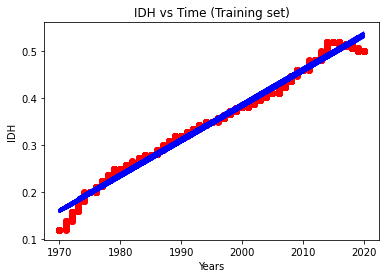

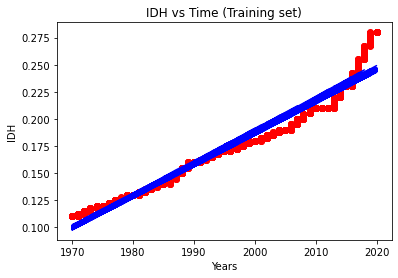

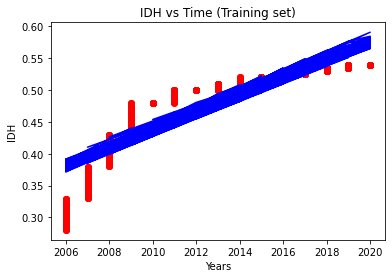

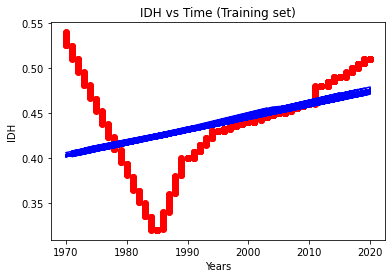

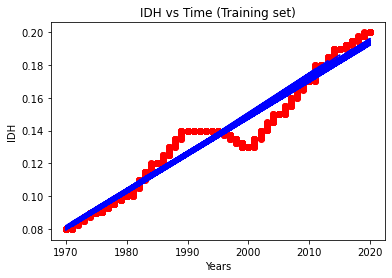

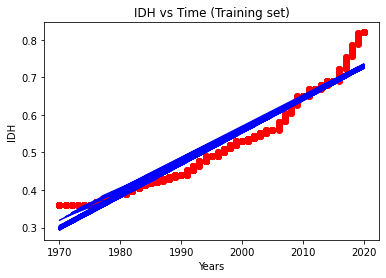

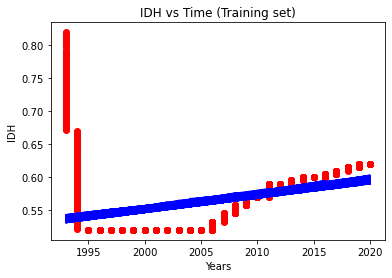

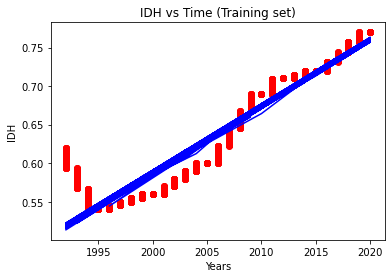

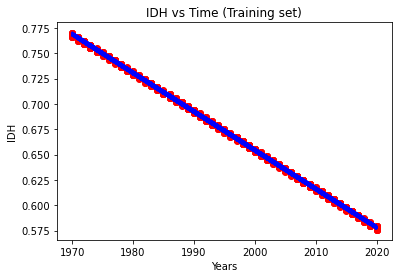

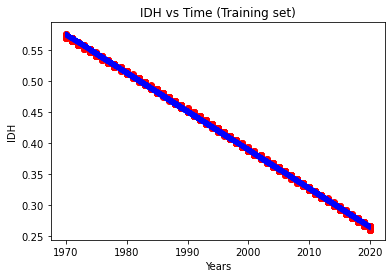

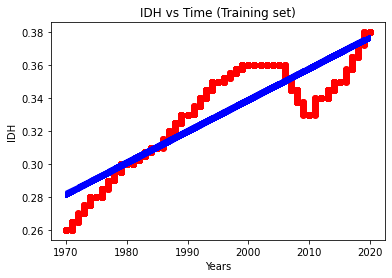

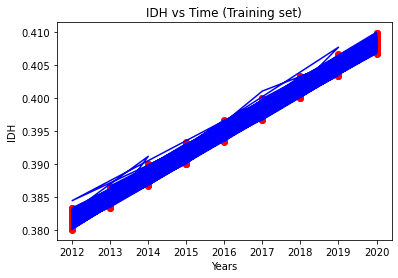

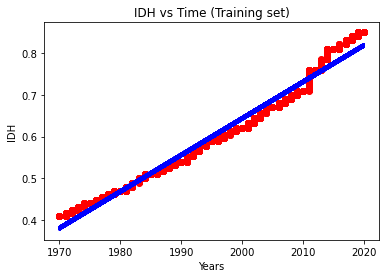

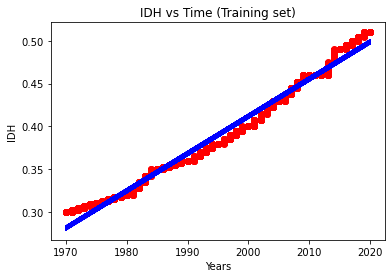

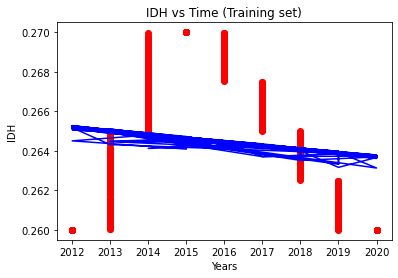

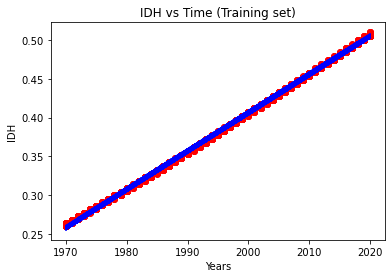

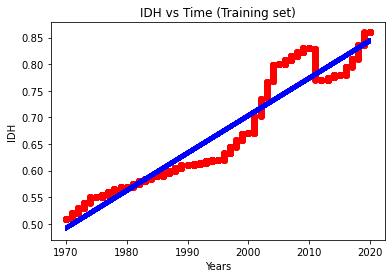

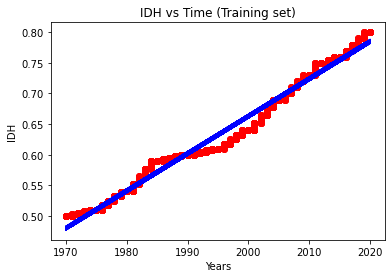

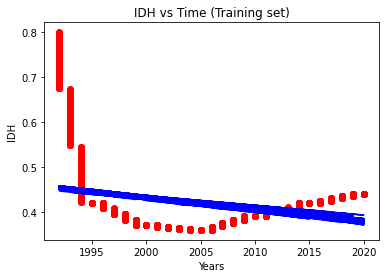

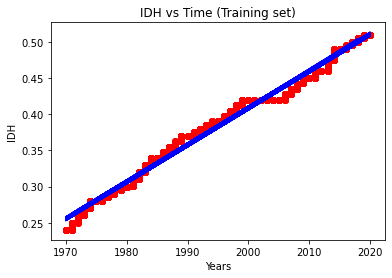

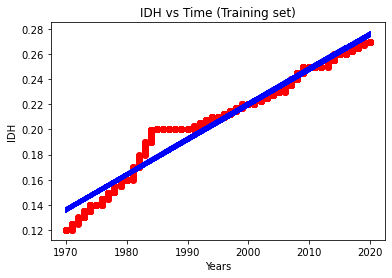

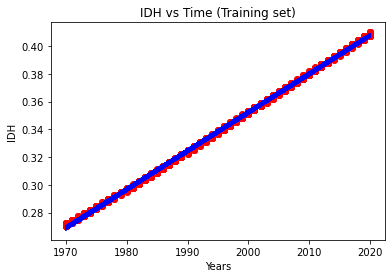

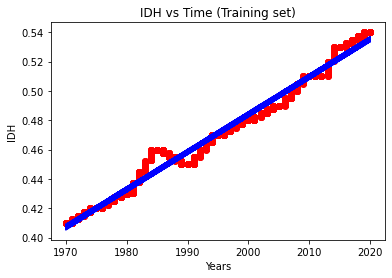

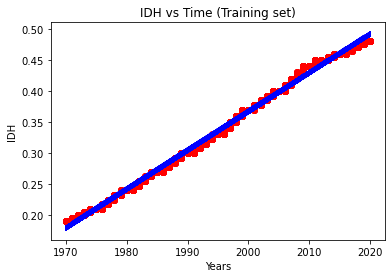

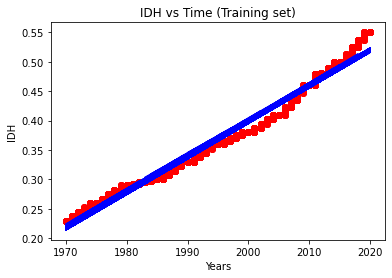

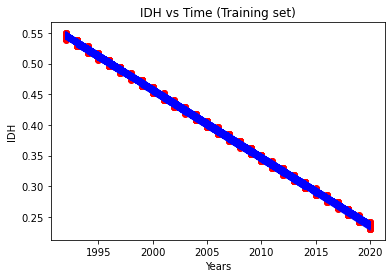

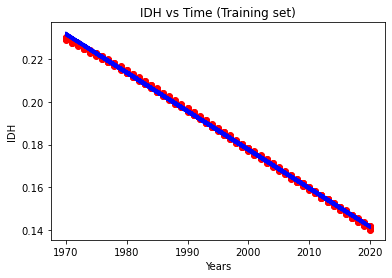

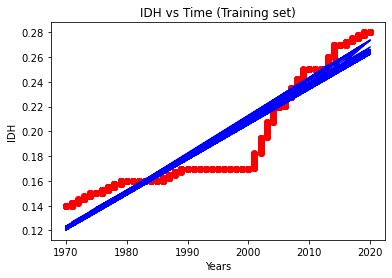

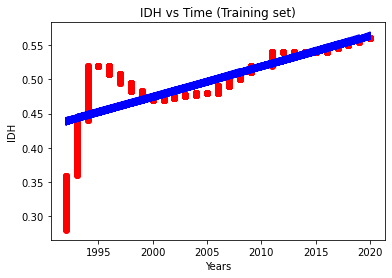

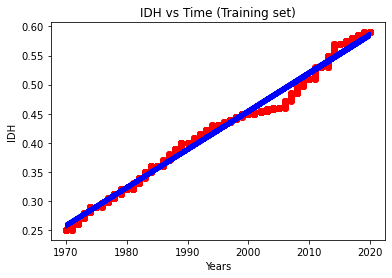

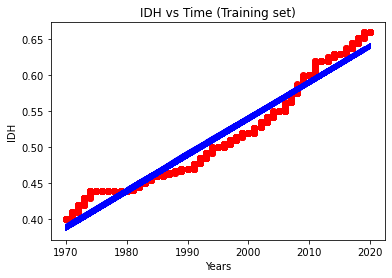

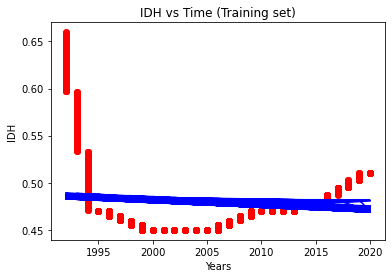

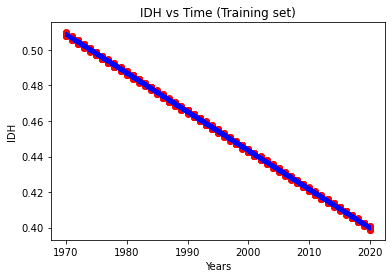

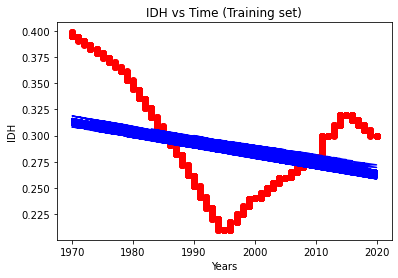

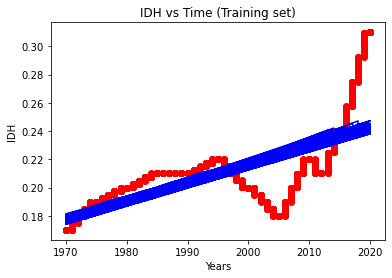

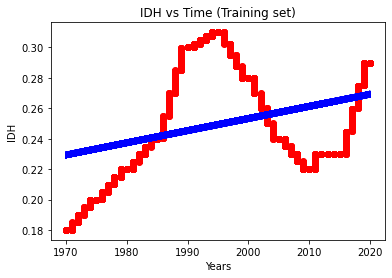

In [87]:
for area in df_idh['Area'].unique():
    df_idh_temp = df_idh[df_idh['Area'] == area]
    X = df_idh_temp.iloc[:, :-1].values
    y = df_idh_temp.iloc[:, -1].values

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    plt.scatter(X_train[:,3], y_train, color = 'red')
    plt.plot(X_train[:,3], regressor.predict(X_train), color = 'blue')
    plt.title('IDH vs Time (Training set)')
    plt.xlabel('Years')
    plt.ylabel('IDH')
    plt.show()

## Linear Multipla

### GDP

In [88]:
for area in df_gdp['Area'].unique():
    df_gdp_temp = df_gdp[df_gdp['Area'] == area]
    X = df_gdp_temp.iloc[:, :-1].values
    y = df_gdp_temp.iloc[:, -1].values

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[10105.45  4553.  ]
 [11633.96  8556.  ]
 [ 2335.67  3737.28]
 ...
 [11550.16  8556.  ]
 [13925.11 17890.  ]
 [  418.93  2556.  ]]
[[ 2181.46  2319.  ]
 [ 6809.09  3209.  ]
 [ 7966.29  5611.  ]
 ...
 [10100.93 11937.  ]
 [ 4345.09  2221.  ]
 [-1487.1   2266.  ]]
[[ 65100.52  46670.  ]
 [ 31421.21  44780.  ]
 [118409.01 103198.  ]
 ...
 [118125.38 103198.  ]
 [ 27645.51  44372.  ]
 [121905.17 117027.  ]]
[[ 74372.59 111790.  ]
 [ -5012.68   4845.  ]
 [ 42373.36   7958.  ]
 ...
 [ 18092.27   9818.  ]
 [ 60987.4   52381.  ]
 [ 67043.53  70307.  ]]
[[ 474.76  439.  ]
 [ 340.68  241.  ]
 [ 208.6   148.  ]
 ...
 [1468.43 1688.  ]
 [1202.84 1138.  ]
 [ 607.48  535.  ]]
[[211484.92 211979.  ]
 [222075.42 255787.  ]
 [ 11334.4   37908.  ]
 ...
 [178629.04 142386.  ]
 [391056.46 363545.  ]
 [211733.51 211979.  ]]
[[ 4127.74  2118.  ]
 [ 5634.67  3577.  ]
 [ 9144.36 10142.  ]
 ...
 [ 5026.93  2807.  ]
 [ 4018.58  2118.  ]
 [13689.58 12642.  ]]
[[ 501180.39  309308.  ]
 [1118939.31 1519024.  ]
 [

### IDH

In [89]:
for area in df_idh['Area'].unique():
    df_idh_temp = df_idh[df_idh['Area'] == area]
    X = df_idh_temp.iloc[:, :-1].values
    y = df_idh_temp.iloc[:, -1].values

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0.14 0.12]
 [0.15 0.12]
 [0.09 0.09]
 ...
 [0.15 0.12]
 [0.17 0.16]
 [0.08 0.09]]
[[0.35 0.37]
 [0.43 0.38]
 [0.45 0.4 ]
 ...
 [0.48 0.46]
 [0.39 0.38]
 [0.29 0.3 ]]
[[0.28 0.29]
 [0.23 0.23]
 [0.36 0.35]
 ...
 [0.36 0.35]
 [0.23 0.22]
 [0.36 0.35]]
[[0.22 0.23]
 [0.1  0.11]
 [0.17 0.15]
 ...
 [0.14 0.15]
 [0.2  0.18]
 [0.21 0.21]]
[[0.31 0.31]
 [0.3  0.3 ]
 [0.3  0.3 ]
 ...
 [0.39 0.39]
 [0.37 0.37]
 [0.32 0.32]]
[[0.5  0.48]
 [0.5  0.49]
 [0.39 0.4 ]
 ...
 [0.48 0.47]
 [0.6  0.59]
 [0.5  0.48]]
[[0.51 0.47]
 [0.52 0.5 ]
 [0.54 0.54]
 ...
 [0.52 0.49]
 [0.51 0.47]
 [0.57 0.58]]
[[0.67 0.61]
 [0.84 0.85]
 [0.73 0.77]
 ...
 [0.63 0.59]
 [0.79 0.82]
 [0.7  0.65]]
[[0.56 0.56]
 [0.49 0.51]
 [0.51 0.53]
 ...
 [0.67 0.68]
 [0.76 0.78]
 [0.76 0.79]]
[[0.48 0.43]
 [0.48 0.42]
 [0.48 0.42]
 ...
 [0.48 0.47]
 [0.48 0.5 ]
 [0.49 0.52]]
[[0.45 0.46]
 [0.47 0.48]
 [0.44 0.43]
 ...
 [0.53 0.51]
 [0.43 0.43]
 [0.55 0.56]]
[[0.32 0.31]
 [0.39 0.39]
 [0.33 0.33]
 ...
 [0.46 0.46]
 [0.39 0.39]
 [0.38

## Polinomial

### GDP

In [90]:
for area in df_gdp['Area'].unique():
    df_gdp_temp = df_gdp[df_gdp['Area'] == area]
    X = df_gdp_temp.iloc[:, :-1].values
    y = df_gdp_temp.iloc[:, -1].values
    
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)

    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(degree = 4)
    X_poly = poly_reg.fit_transform(X)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)

In [91]:
df[(df['Value'] == 375942)&(df['Area'] == 'Zimbabwe')]

Area   Item Element  Year  Unit     Value   IDH      GDP
1993305  Zimbabwe  Sheep  Stocks  2020  Head  375942.0  0.29  26878.0

In [92]:
lin_reg.predict([[170, 107, 2, 2030, 1, 451131]])

array([23920.91])

In [93]:
lin_reg_2.predict(poly_reg.fit_transform([[170, 107, 2, 2030, 1, 451131]]))

array([49898.22])

### IDH

In [94]:
for area in df_idh['Area'].unique():
    df_idh_temp = df_idh[df_idh['Area'] == area]
    X = df_idh_temp.iloc[:, :-1].values
    y = df_idh_temp.iloc[:, -1].values
    
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)

    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(degree = 4)
    X_poly = poly_reg.fit_transform(X)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)

In [95]:
lin_reg.predict([[170, 107, 2, 2030, 1, 451131]])

array([0.28])

In [96]:
lin_reg_2.predict(poly_reg.fit_transform([[170, 107, 2, 2030, 1, 451131]]))

array([0.33])

# Validação dos resultados

## Cross validation

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

lm = LinearRegression()

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_poly, y, scoring='r2', cv=folds)
scores   


array([-0.02, -0.03, -0.33, -0.04, -0.07])

## MSE


In [98]:
scores = cross_val_score(lm, X_poly, y, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.01, -0.  , -0.  , -0.  , -0.  ])